# Financial Data - Advanced Analysis Techniques

## Importing Financial Data from Excel

In [1]:
import pandas as pd

In [4]:
# Read exel, see info 
pd.read_excel("../Data/SP500.xls").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12107 entries, 0 to 12106
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12107 non-null  datetime64[ns]
 1   Open       12107 non-null  float64       
 2   High       12107 non-null  float64       
 3   Low        12107 non-null  float64       
 4   Close      12107 non-null  float64       
 5   Adj Close  12107 non-null  float64       
 6   Volume     12107 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 662.2 KB


In [5]:
# Read exel
pd.read_excel("../Data/SP500.xls", parse_dates= ["Date"], index_col = "Date")

Open         High          Low        Close    Adj Close  \
Date                                                                          
1970-12-31    92.269997    92.790001    91.360001    92.150002    92.150002   
1971-01-04    92.150002    92.190002    90.639999    91.150002    91.150002   
1971-01-05    91.150002    92.279999    90.690002    91.800003    91.800003   
1971-01-06    91.800003    93.000000    91.500000    92.349998    92.349998   
1971-01-07    92.349998    93.260002    91.750000    92.379997    92.379997   
...                 ...          ...          ...          ...          ...   
2018-12-21  2465.379883  2504.409912  2408.550049  2416.620117  2416.620117   
2018-12-24  2400.560059  2410.340088  2351.100098  2351.100098  2351.100098   
2018-12-26  2363.120117  2467.760010  2346.580078  2467.699951  2467.699951   
2018-12-27  2442.500000  2489.100098  2397.939941  2488.830078  2488.830078   
2018-12-28  2498.770020  2520.270020  2472.889893  2485.739990  2485.739990   

                Volume  
Date                    
1970-12-31    13390000  
1971-01-04    10010000  
1971-01-05    12600000  
1971-01-06    16960000  
1971-01-07    16460000  
...                ...  
2018-12-21  -980924592  
2018-12-24 -1681037296  
2018-12-26   -60977296  
2018-12-27  -198357296  
2018-12-28  -592347296  

[12107 rows x 6 columns]

In [6]:
# read specific columns
pd.read_excel("../Data/SP500.xls", 
              parse_dates= ["Date"], 
              index_col = "Date", 
              usecols = "A, C:E") # only cols A, C to E

High          Low        Close
Date                                             
1970-12-31    92.790001    91.360001    92.150002
1971-01-04    92.190002    90.639999    91.150002
1971-01-05    92.279999    90.690002    91.800003
1971-01-06    93.000000    91.500000    92.349998
1971-01-07    93.260002    91.750000    92.379997
...                 ...          ...          ...
2018-12-21  2504.409912  2408.550049  2416.620117
2018-12-24  2410.340088  2351.100098  2351.100098
2018-12-26  2467.760010  2346.580078  2467.699951
2018-12-27  2489.100098  2397.939941  2488.830078
2018-12-28  2520.270020  2472.889893  2485.739990

[12107 rows x 3 columns]

In [7]:
pd.read_excel("../Data/SP500.xls", sheet_name= "Sales")

Unnamed: 0      City  Sales
0       Mike  New York     25
1        Jim    Boston     43
2     Steven    London     76
3        Joe    Madrid     12
4        Tom     Paris     89

In [8]:
SP500 = pd.read_excel("../Data/SP500.xls", 
                      parse_dates= ["Date"], 
                      index_col = "Date", 
                      usecols= "A:E")

In [9]:
SP500.head()

Open       High        Low      Close
Date                                                  
1970-12-31  92.269997  92.790001  91.360001  92.150002
1971-01-04  92.150002  92.190002  90.639999  91.150002
1971-01-05  91.150002  92.279999  90.690002  91.800003
1971-01-06  91.800003  93.000000  91.500000  92.349998
1971-01-07  92.349998  93.260002  91.750000  92.379997

In [10]:
SP500.tail()

Open         High          Low        Close
Date                                                          
2018-12-21  2465.379883  2504.409912  2408.550049  2416.620117
2018-12-24  2400.560059  2410.340088  2351.100098  2351.100098
2018-12-26  2363.120117  2467.760010  2346.580078  2467.699951
2018-12-27  2442.500000  2489.100098  2397.939941  2488.830078
2018-12-28  2498.770020  2520.270020  2472.889893  2485.739990

In [11]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12107 non-null  float64
 1   High    12107 non-null  float64
 2   Low     12107 non-null  float64
 3   Close   12107 non-null  float64
dtypes: float64(4)
memory usage: 472.9 KB


In [12]:
SP500.to_csv("SP500.csv")

In [ ]:
SP500.to_excel("SP500_red.xls")

---

# Simple Moving Averages (SMA) with rolling()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

C:\Users\97250\AppData\Local\Temp\ipykernel_9960\246556626.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [19]:
SP500 = pd.read_csv("SP500.csv", parse_dates = ["Date"], index_col = "Date")

In [20]:
SP500.head()

Open       High        Low      Close
Date                                                  
1970-12-31  92.269997  92.790001  91.360001  92.150002
1971-01-04  92.150002  92.190002  90.639999  91.150002
1971-01-05  91.150002  92.279999  90.690002  91.800003
1971-01-06  91.800003  93.000000  91.500000  92.349998
1971-01-07  92.349998  93.260002  91.750000  92.379997

In [21]:
SP500.tail()

Open         High          Low        Close
Date                                                          
2018-12-21  2465.379883  2504.409912  2408.550049  2416.620117
2018-12-24  2400.560059  2410.340088  2351.100098  2351.100098
2018-12-26  2363.120117  2467.760010  2346.580078  2467.699951
2018-12-27  2442.500000  2489.100098  2397.939941  2488.830078
2018-12-28  2498.770020  2520.270020  2472.889893  2485.739990

In [22]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12107 non-null  float64
 1   High    12107 non-null  float64
 2   Low     12107 non-null  float64
 3   Close   12107 non-null  float64
dtypes: float64(4)
memory usage: 472.9 KB


In [23]:
# Save the close price only, convert to df 
SP500 = SP500.Close.to_frame()

In [24]:
SP500.head()

Close
Date                 
1970-12-31  92.150002
1971-01-04  91.150002
1971-01-05  91.800003
1971-01-06  92.349998
1971-01-07  92.379997

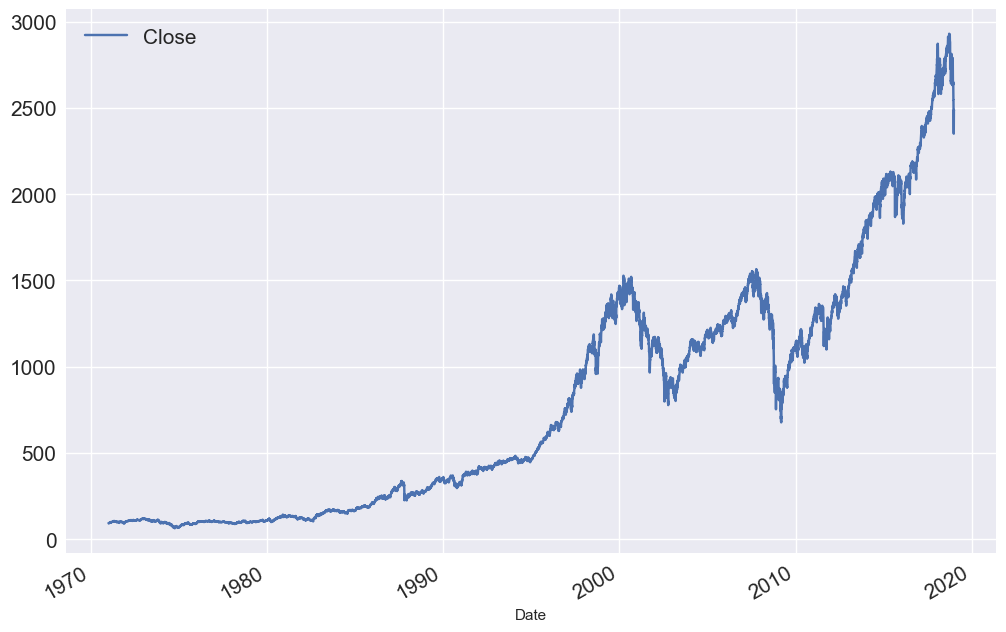

In [25]:
# Plot the close price of the SP-500
SP500.plot(figsize = (12,8), fontsize= 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [26]:
# Extract this range: 
SP500 = SP500.loc["2008-12-31":"2018-12-31"].copy()

In [27]:
# explore the rolling object 
SP500.rolling(window = 10)

Rolling [window=10,center=False,axis=0,method=single]

In [28]:
# explore the rolling object
type(SP500.rolling(window = 10))

pandas.core.window.rolling.Rolling

In [29]:
SP500.head(15)

Close
Date                  
2008-12-31  903.250000
2009-01-02  931.799988
2009-01-05  927.450012
2009-01-06  934.700012
2009-01-07  906.650024
2009-01-08  909.729980
2009-01-09  890.349976
2009-01-12  870.260010
2009-01-13  871.789978
2009-01-14  842.619995
2009-01-15  843.739990
2009-01-16  850.119995
2009-01-20  805.219971
2009-01-21  840.239990
2009-01-22  827.500000

In [30]:
# Take the rolling mean (simple moving avarage)
SP500.rolling(window = 10).mean()

Close
Date                   
2008-12-31          NaN
2009-01-02          NaN
2009-01-05          NaN
2009-01-06          NaN
2009-01-07          NaN
...                 ...
2018-12-21  2565.915991
2018-12-24  2537.254004
2018-12-26  2520.345996
2018-12-27  2504.121997
2018-12-28  2487.641992

[2516 rows x 1 columns]

In [31]:
SP500.rolling(window = 10).mean()

Close
Date                   
2008-12-31          NaN
2009-01-02          NaN
2009-01-05          NaN
2009-01-06          NaN
2009-01-07          NaN
...                 ...
2018-12-21  2565.915991
2018-12-24  2537.254004
2018-12-26  2520.345996
2018-12-27  2504.121997
2018-12-28  2487.641992

[2516 rows x 1 columns]

In [32]:
# Take the rolling mean, with min periods of 5 
SP500.rolling(window = 10, min_periods=5).mean()

Close
Date                   
2008-12-31          NaN
2009-01-02          NaN
2009-01-05          NaN
2009-01-06          NaN
2009-01-07   920.770007
...                 ...
2018-12-21  2565.915991
2018-12-24  2537.254004
2018-12-26  2520.345996
2018-12-27  2504.121997
2018-12-28  2487.641992

[2516 rows x 1 columns]

---

# Momentum Trading Strategies with SMAs

In [33]:
SP500.head()

Close
Date                  
2008-12-31  903.250000
2009-01-02  931.799988
2009-01-05  927.450012
2009-01-06  934.700012
2009-01-07  906.650024

In [34]:
SP500.tail()

Close
Date                   
2018-12-21  2416.620117
2018-12-24  2351.100098
2018-12-26  2467.699951
2018-12-27  2488.830078
2018-12-28  2485.739990

In [35]:
# Simple moving avarage of 50
SP500["SMA50"] = SP500.rolling(window = 50, min_periods=50).mean()

In [36]:
SP500

Close        SMA50
Date                                
2008-12-31   903.250000          NaN
2009-01-02   931.799988          NaN
2009-01-05   927.450012          NaN
2009-01-06   934.700012          NaN
2009-01-07   906.650024          NaN
...                 ...          ...
2018-12-21  2416.620117  2692.420195
2018-12-24  2351.100098  2684.874795
2018-12-26  2467.699951  2678.886196
2018-12-27  2488.830078  2673.646997
2018-12-28  2485.739990  2667.163398

[2516 rows x 2 columns]

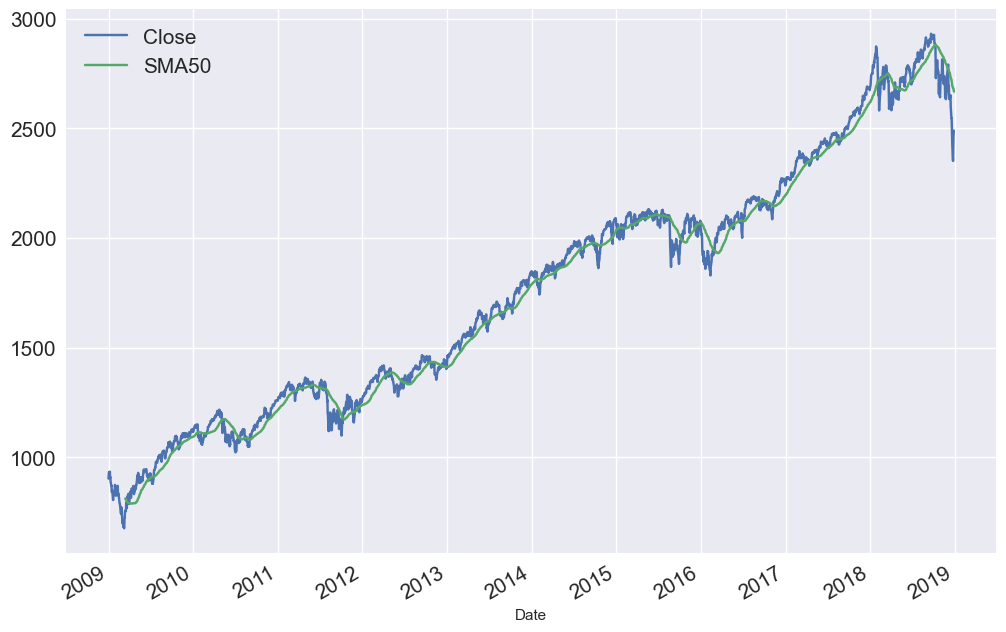

In [37]:
# Plot the close price and its SMA
SP500.plot(figsize = (12, 8), fontsize = 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [38]:
# Compute the simple moving avarage of 200 
SP500["SMA200"] = SP500.Close.rolling(window = 200).mean()

In [39]:
SP500.tail()

Close        SMA50      SMA200
Date                                            
2018-12-21  2416.620117  2692.420195  2753.65980
2018-12-24  2351.100098  2684.874795  2751.48245
2018-12-26  2467.699951  2678.886196  2749.90585
2018-12-27  2488.830078  2673.646997  2748.52345
2018-12-28  2485.739990  2667.163398  2747.20475

In [40]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2008-12-31 to 2018-12-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2516 non-null   float64
 1   SMA50   2467 non-null   float64
 2   SMA200  2317 non-null   float64
dtypes: float64(3)
memory usage: 78.6 KB


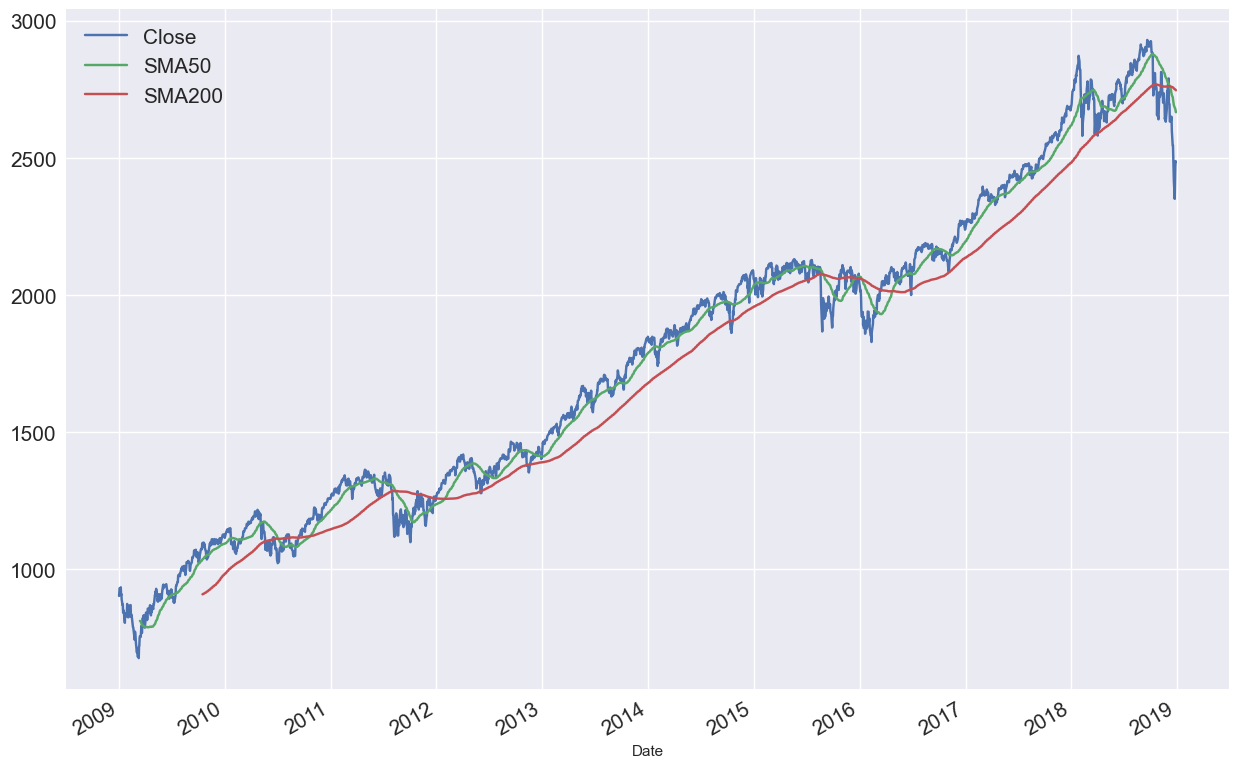

In [41]:
# Plot the short and long moving avarage, and the close price
SP500.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

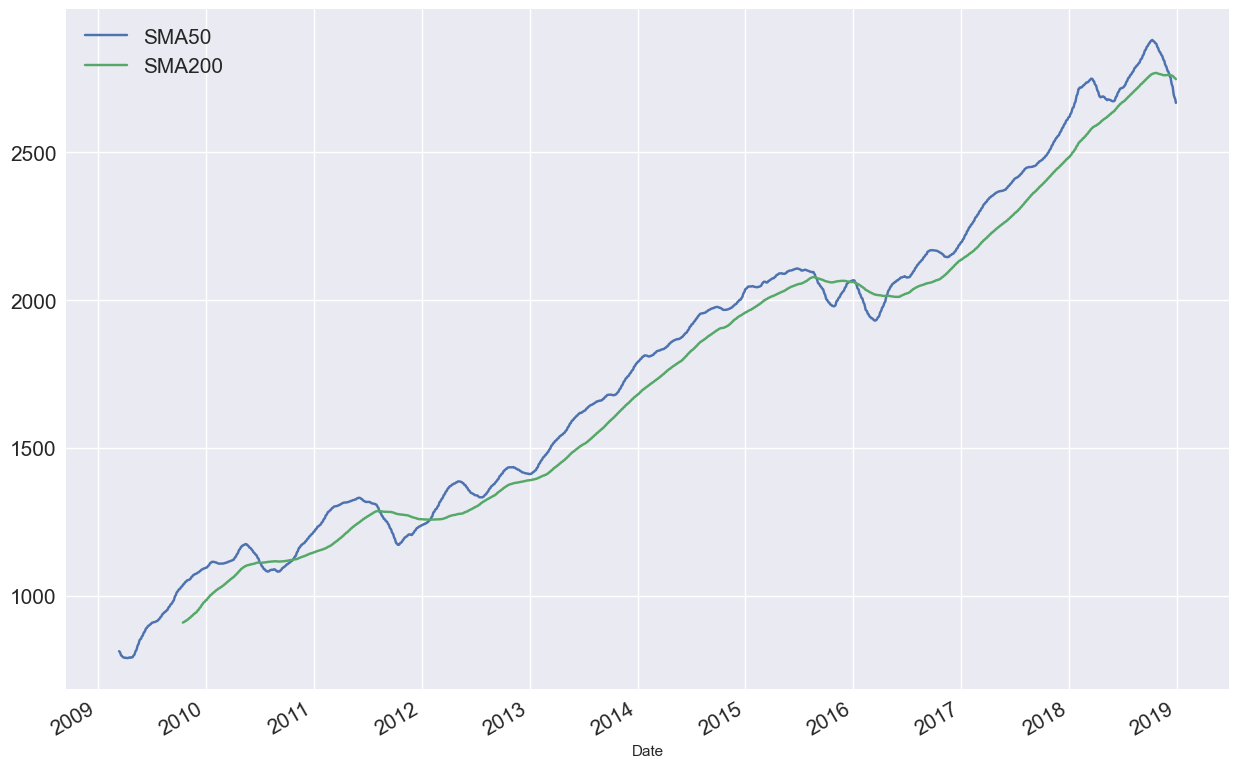

In [42]:
# Plot only the SMAs (long and short)
SP500.iloc[:,-2:].plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

---

# Performance Reporting with rolling()

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

C:\Users\97250\AppData\Local\Temp\ipykernel_9960\835644547.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [73]:
# Read the SP500, use only the columns Data,Close. 
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col = "Date", 
                    usecols= ["Date", "Close"])

In [74]:
SP500.head()

Close
Date                 
1970-12-31  92.150002
1971-01-04  91.150002
1971-01-05  91.800003
1971-01-06  92.349998
1971-01-07  92.379997

In [75]:
# Resample the data to monthly frequency.
SP500.resample("M", kind = "period").last()

Close
Date                
1970-12    92.150002
1971-01    95.879997
1971-02    96.750000
1971-03   100.309998
1971-04   103.949997
...              ...
2018-08  2901.520020
2018-09  2913.979980
2018-10  2711.739990
2018-11  2760.169922
2018-12  2485.739990

[577 rows x 1 columns]

In [76]:
# resample and compute the simple monthly return in precent
month_ret = SP500.resample("M", kind = "period").last().pct_change().dropna()

In [77]:
month_ret

Close
Date             
1971-01  0.040477
1971-02  0.009074
1971-03  0.036796
1971-04  0.036287
1971-05 -0.041558
...           ...
2018-08  0.030263
2018-09  0.004294
2018-10 -0.069403
2018-11  0.017859
2018-12 -0.099425

[576 rows x 1 columns]

In [78]:
# calculate the rolling mean return of the immediately preceding 36 months.
# *12 -> for annualize that 
month_ret.rolling(36).mean()*12

# annualized average monthly returns over the last 36:

Close
Date             
1971-01       NaN
1971-02       NaN
1971-03       NaN
1971-04       NaN
1971-05       NaN
...           ...
2018-08  0.133653
2018-09  0.143899
2018-10  0.093103
2018-11  0.098888
2018-12  0.071590

[576 rows x 1 columns]

In [79]:
# compute the annualized average monthly returns over the last 36
month_ret["Return"] = month_ret.rolling(36).mean()*12

In [80]:
month_ret.Close.rolling(36).std()*np.sqrt(12)

Date
1971-01         NaN
1971-02         NaN
1971-03         NaN
1971-04         NaN
1971-05         NaN
             ...   
2018-08    0.094305
2018-09    0.091740
2018-10    0.093480
2018-11    0.093556
2018-12    0.111514
Freq: M, Name: Close, Length: 576, dtype: float64

In [81]:
# calculate the annualized average monthly risk over the last 36
month_ret["Risk"] = month_ret.Close.rolling(36).std()*np.sqrt(12)

In [82]:
month_ret.dropna(inplace= True)

In [83]:
month_ret.head()

Close    Return      Risk
Date                                 
1973-12  0.016569  0.026493  0.123219
1974-01 -0.010046  0.009652  0.121276
1974-02 -0.003624  0.005419  0.121201
1974-03 -0.023280 -0.014606  0.119981
1974-04 -0.039051 -0.039719  0.119791

In [84]:
month_ret.tail()

Close    Return      Risk
Date                                 
2018-08  0.030263  0.133653  0.094305
2018-09  0.004294  0.143899  0.091740
2018-10 -0.069403  0.093103  0.093480
2018-11  0.017859  0.098888  0.093556
2018-12 -0.099425  0.071590  0.111514

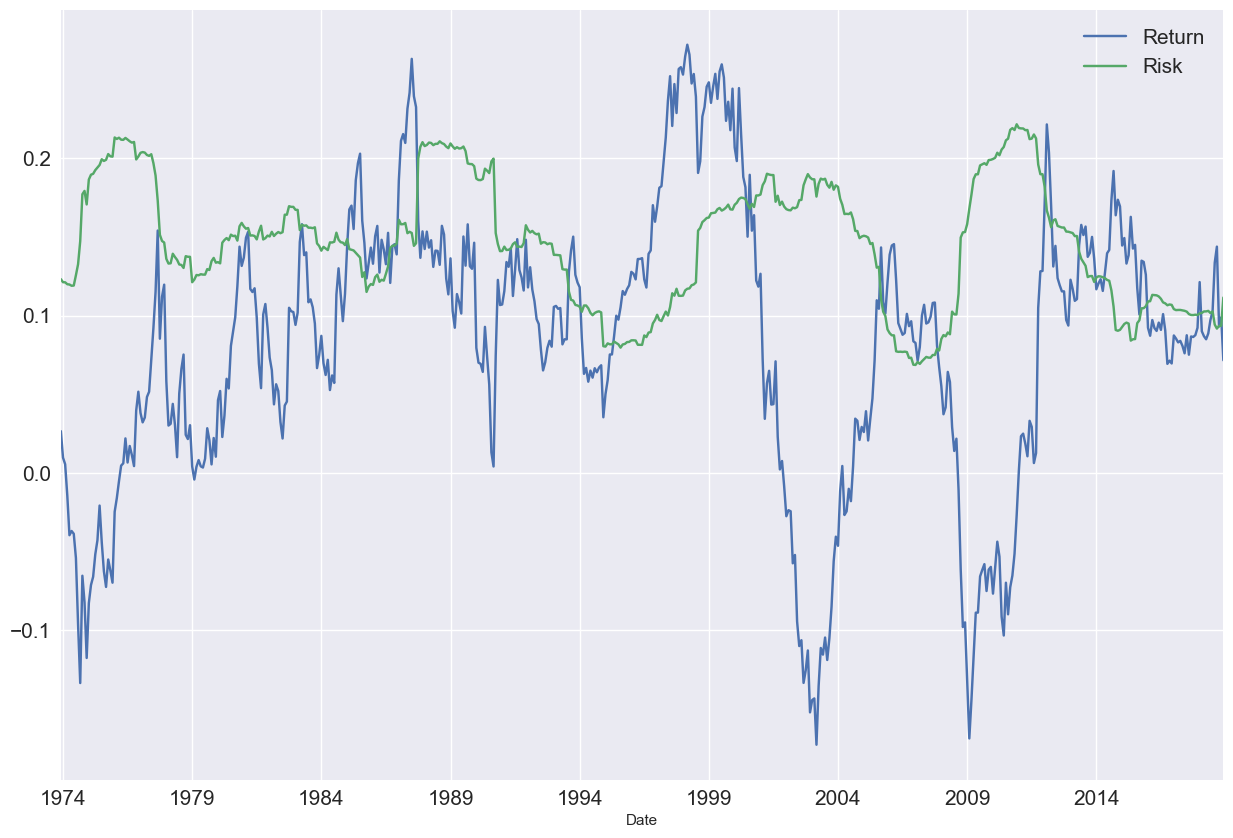

In [85]:
# Plot the rolling risk and rolling return 
# [:,-2:] -> take the last 2 columns
month_ret.iloc[:,-2:].plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()


# Interpretation
# this is the annualize rolling risk of last 36 month,
# and the annualize rolling return of last 36 month.



In [86]:
month_ret.iloc[:,-2:].corr()

Return      Risk
Return  1.000000 -0.327747
Risk   -0.327747  1.000000

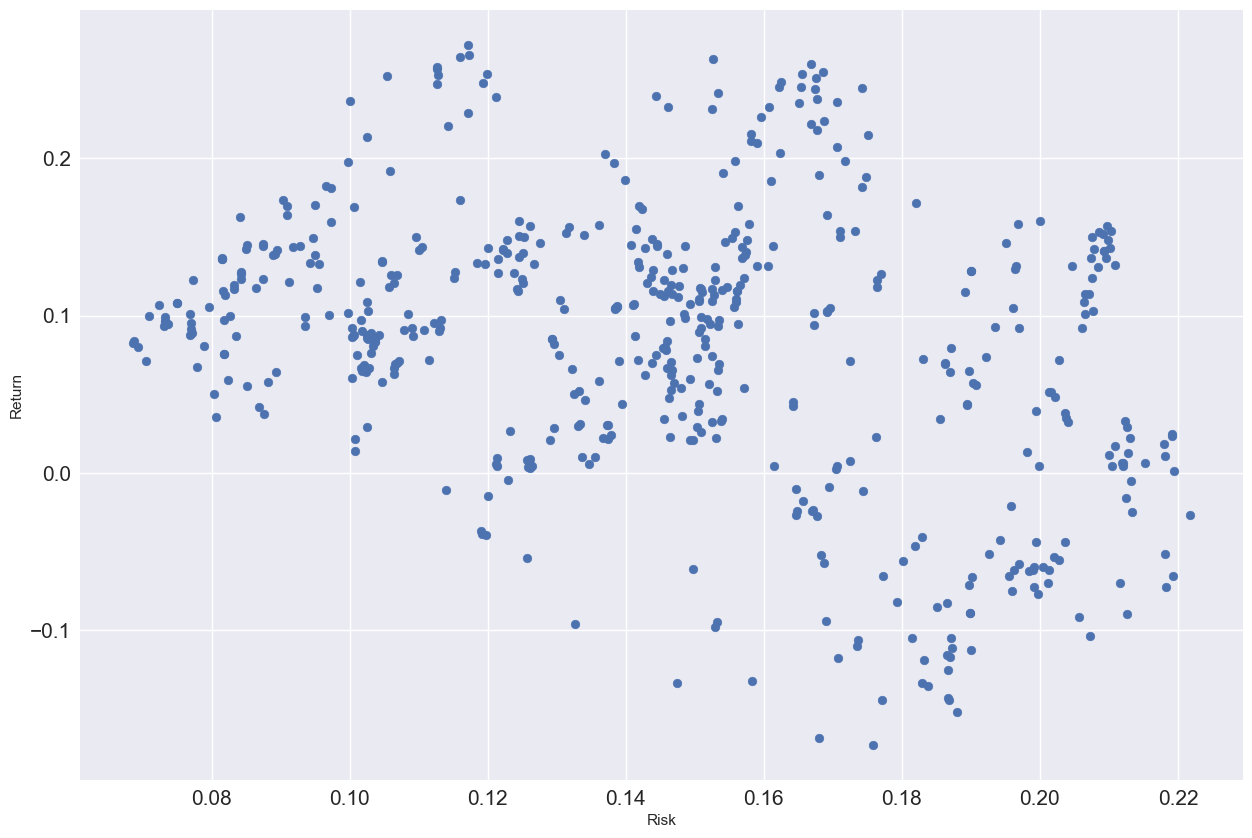

In [88]:
# Plot the risk & return as a scatter plot
# we can see that there is week negative correlation..
month_ret.iloc[:,-2:].plot(kind = "scatter", 
                           x = "Risk", 
                           y = "Return", 
                           figsize = (15,10), 
                           fontsize= 15, 
                           s = 40)

plt.show()

---

# Performance and Investment Periods / Time Diversification

> We are going to calculate the __annualized average monthly returns__ with the rolling windows of 12 months to 240 months.

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\97250\AppData\Local\Temp\ipykernel_9960\3483326838.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [90]:
SP500 = pd.read_csv("SP500.csv", 
                    parse_dates= ["Date"], 
                    index_col = "Date",
                    usecols = ["Date", "Close"])

In [91]:
SP500.head()

Close
Date                 
1970-12-31  92.150002
1971-01-04  91.150002
1971-01-05  91.800003
1971-01-06  92.349998
1971-01-07  92.379997

In [92]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   12107 non-null  float64
dtypes: float64(1)
memory usage: 189.2 KB


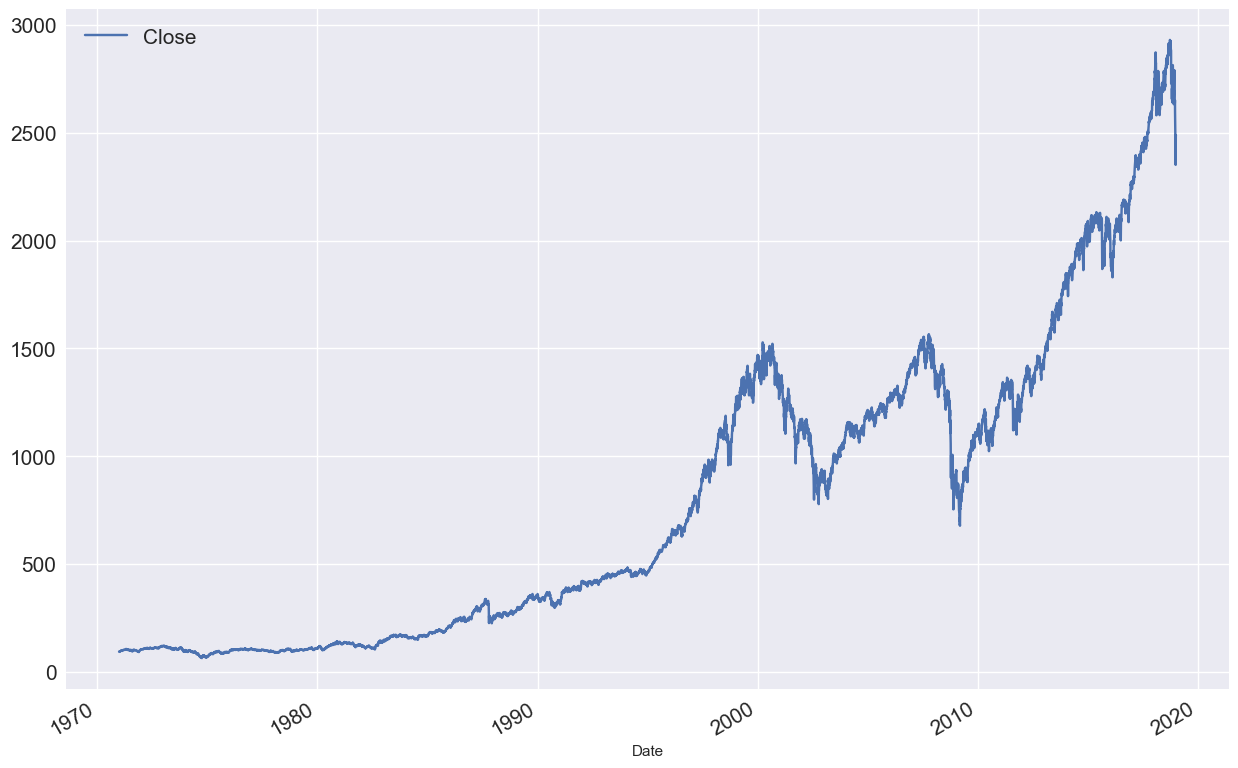

In [93]:
# Plot the close price
SP500.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

In [94]:
# Compute the monthly return
month_ret = SP500.resample("M", kind = "period").last().pct_change().dropna()

In [95]:
month_ret.tail()

Close
Date             
2018-08  0.030263
2018-09  0.004294
2018-10 -0.069403
2018-11  0.017859
2018-12 -0.099425

In [96]:
month_ret.columns = ["m_returns"]

In [97]:
# rolling annualize mean return for the last 36 months   
month_ret.rolling(3 * 12).mean()*12

m_returns
Date              
1971-01        NaN
1971-02        NaN
1971-03        NaN
1971-04        NaN
1971-05        NaN
...            ...
2018-08   0.133653
2018-09   0.143899
2018-10   0.093103
2018-11   0.098888
2018-12   0.071590

[576 rows x 1 columns]

In [102]:
for years in [1, 3, 5, 10, 20]: # for each years
    # calculating the rolling annualized mean of monthly returns
    # for a specified number of years:
    month_ret[f"{years}Y"] = month_ret.m_returns.rolling(years*12).mean()*12

In [103]:
month_ret.tail()

# Interpretation
# the mean retur over 20 years, in 2018-12, is: 0.045877

m_returns        1Y        3Y        5Y       10Y       20Y
Date                                                                
2018-08   0.030263  0.165207  0.133653  0.119980  0.092904  0.066120
2018-09   0.004294  0.150198  0.143899  0.114889  0.102412  0.063215
2018-10  -0.069403  0.058606  0.093103  0.092089  0.112415  0.055730
2018-11   0.017859  0.048383  0.098888  0.090051  0.121685  0.053667
2018-12  -0.099425 -0.060874  0.071590  0.065453  0.110961  0.045877

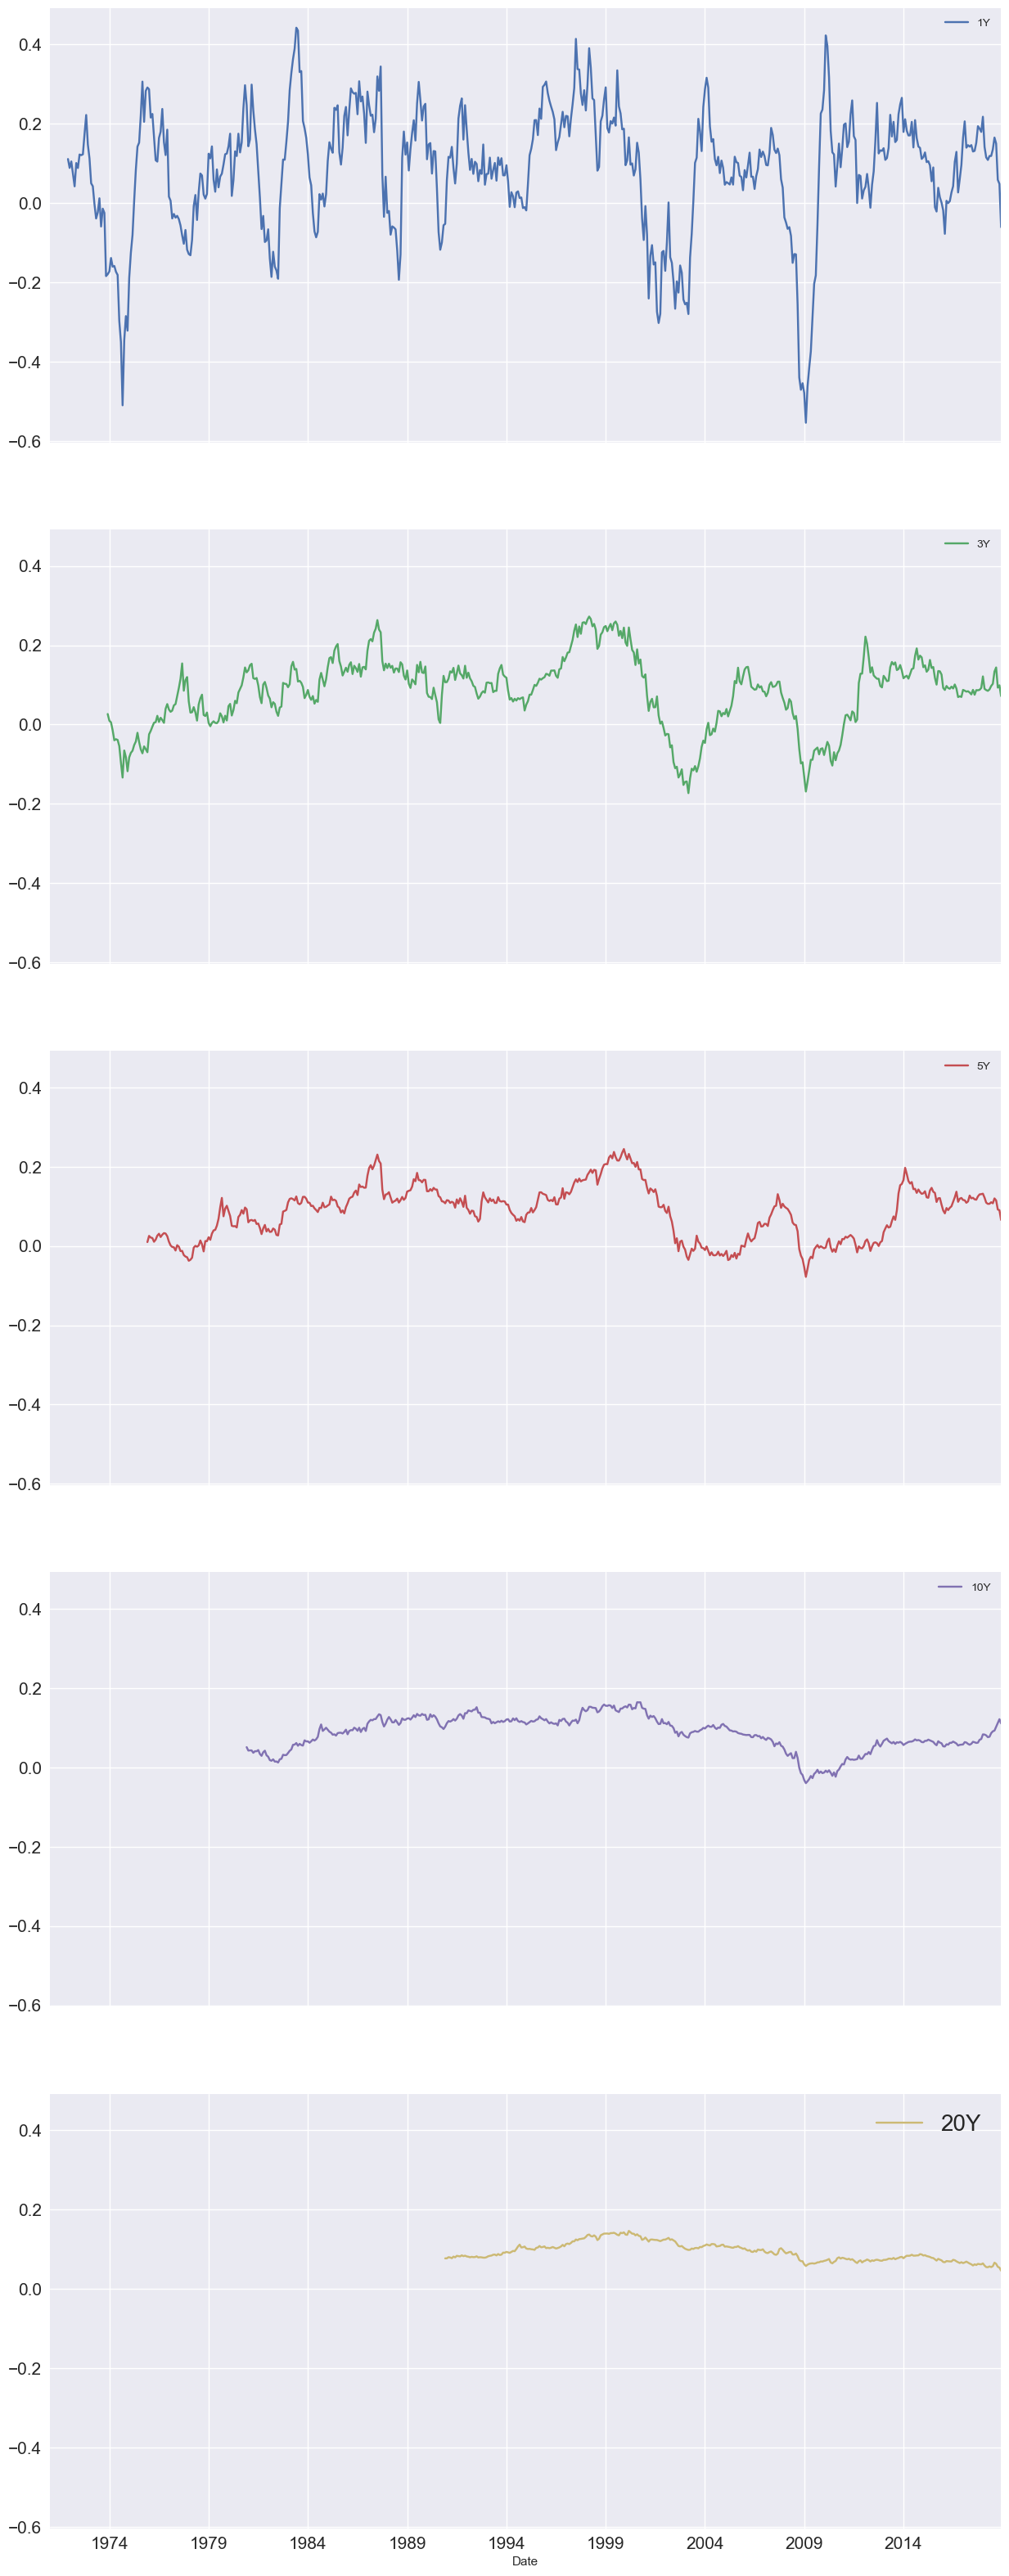

In [107]:
# the rolling annualized mean of monthly returns 
# for a specified number of years.  
month_ret.iloc[:,-5:].plot(figsize = (15,40), 
                           subplots =True, 
                           fontsize= 15, 
                           sharey = True)
plt.legend(fontsize = 20)
plt.show()

# Quick Interpretation::
# - the longer the investment period, the less volatile our graph is here.

---

# Simple Returns vs. Log Returns

In [124]:
import pandas as pd
import numpy as np

In [125]:
df = pd.DataFrame(index = [2016, 2017, 2018], data = [100, 50, 95], columns = ["Price"])

In [126]:
df

Price
2016    100
2017     50
2018     95

In [127]:
# Compute the simple returns (in precents)
simple_returns = df.pct_change().dropna()
simple_returns

Price
2017   -0.5
2018    0.9

In [128]:
# Compute the mean simple return
simple_returns.mean()

Price    0.2
dtype: float64

In [136]:
# E.g, with return of 0.20%, this is be the amount if we invested 100$
# after 2 years. 
100*1.2**2

144.0

In [130]:
# show the data
df

Price
2016    100
2017     50
2018     95

In [131]:
# Calculate the log return 
np.log(df / df.shift(1))

Price
2016       NaN
2017 -0.693147
2018  0.641854

In [132]:
# Compute the log return 
log_returns = np.log(df / df.shift(1)).dropna()

In [133]:
log_returns

Price
2017 -0.693147
2018  0.641854

In [134]:
# Take the mean log return (its the mean return of the log return)
log_returns.mean()

Price   -0.025647
dtype: float64

In [154]:
150 * np.exp(4*0.042)

177.44049159717162

In [135]:
# get the price after 2 periods. 
100 * np.exp(2 * log_returns.mean())

Price    95.0
dtype: float64

---

# The S&P 500 Return Triangle

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\97250\AppData\Local\Temp\ipykernel_9960\1074677123.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [156]:
# read the SP500, use also the close price column
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col= "Date", 
                    usecols = ["Date", "Close"])

In [157]:
SP500.head()

Close
Date                 
1970-12-31  92.150002
1971-01-04  91.150002
1971-01-05  91.800003
1971-01-06  92.349998
1971-01-07  92.379997

In [158]:
SP500 = SP500.loc["1988-12-30":"2018-12-31"].copy()

In [159]:
SP500.head()

Close
Date                  
1988-12-30  277.720001
1989-01-03  275.309998
1989-01-04  279.429993
1989-01-05  280.010010
1989-01-06  280.670013

In [160]:
# Resample the data to annual frequency
annual = SP500.resample("A", kind = "period").last()
annual

Close
Date             
1988   277.720001
1989   353.399994
1990   330.220001
1991   417.089996
1992   435.709991
1993   466.450012
1994   459.269989
1995   615.929993
1996   740.739990
1997   970.429993
1998  1229.229980
1999  1469.250000
2000  1320.280029
2001  1148.079956
2002   879.820007
2003  1111.920044
2004  1211.920044
2005  1248.290039
2006  1418.300049
2007  1468.359985
2008   903.250000
2009  1115.099976
2010  1257.640015
2011  1257.599976
2012  1426.189941
2013  1848.359985
2014  2058.899902
2015  2043.939941
2016  2238.830078
2017  2673.610107
2018  2485.739990

In [161]:
# Now, compute the log return for the annual c
annual["Return"] = np.log(annual.Close / annual.Close.shift())

In [162]:
# drop nan
annual.dropna(inplace = True)

In [163]:
annual
# Se far we have the annual close price and the annual return 

Close    Return
Date                       
1989   353.399994  0.240987
1990   330.220001 -0.067841
1991   417.089996  0.233543
1992   435.709991  0.043675
1993   466.450012  0.068174
1994   459.269989 -0.015513
1995   615.929993  0.293495
1996   740.739990  0.184516
1997   970.429993  0.270090
1998  1229.229980  0.236404
1999  1469.250000  0.178364
2000  1320.280029 -0.106908
2001  1148.079956 -0.139753
2002   879.820007 -0.266129
2003  1111.920044  0.234126
2004  1211.920044  0.086118
2005  1248.290039  0.029569
2006  1418.300049  0.127684
2007  1468.359985  0.034687
2008   903.250000 -0.485902
2009  1115.099976  0.210700
2010  1257.640015  0.120293
2011  1257.599976 -0.000032
2012  1426.189941  0.125801
2013  1848.359985  0.259292
2014  2058.899902  0.107873
2015  2043.939941 -0.007293
2016  2238.830078  0.091074
2017  2673.610107  0.177476
2018  2485.739990 -0.072859

In [164]:
# How many year?
years = annual.index.size
years

30

In [165]:
# create windows of 30 to 1
windows = [year for year in range(30, 0, -1)]
windows

[30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1]

In [166]:
# Compute the mean rolling return for each year (1Y,2Y,...,30Y)
for year in windows:
    annual["{}Y".format(year)] = annual.Return.rolling(year).mean()

# its going to preduce the simple moving avarage of 1Y,2Y,..,30Y  

In [167]:
annual

Close    Return       30Y       29Y       28Y       27Y       26Y  \
Date                                                                            
1989   353.399994  0.240987       NaN       NaN       NaN       NaN       NaN   
1990   330.220001 -0.067841       NaN       NaN       NaN       NaN       NaN   
1991   417.089996  0.233543       NaN       NaN       NaN       NaN       NaN   
1992   435.709991  0.043675       NaN       NaN       NaN       NaN       NaN   
1993   466.450012  0.068174       NaN       NaN       NaN       NaN       NaN   
1994   459.269989 -0.015513       NaN       NaN       NaN       NaN       NaN   
1995   615.929993  0.293495       NaN       NaN       NaN       NaN       NaN   
1996   740.739990  0.184516       NaN       NaN       NaN       NaN       NaN   
1997   970.429993  0.270090       NaN       NaN       NaN       NaN       NaN   
1998  1229.229980  0.236404       NaN       NaN       NaN       NaN       NaN   
1999  1469.250000  0.178364       NaN       NaN       NaN       NaN       NaN   
2000  1320.280029 -0.106908       NaN       NaN       NaN       NaN       NaN   
2001  1148.079956 -0.139753       NaN       NaN       NaN       NaN       NaN   
2002   879.820007 -0.266129       NaN       NaN       NaN       NaN       NaN   
2003  1111.920044  0.234126       NaN       NaN       NaN       NaN       NaN   
2004  1211.920044  0.086118       NaN       NaN       NaN       NaN       NaN   
2005  1248.290039  0.029569       NaN       NaN       NaN       NaN       NaN   
2006  1418.300049  0.127684       NaN       NaN       NaN       NaN       NaN   
2007  1468.359985  0.034687       NaN       NaN       NaN       NaN       NaN   
2008   903.250000 -0.485902       NaN       NaN       NaN       NaN       NaN   
2009  1115.099976  0.210700       NaN       NaN       NaN       NaN       NaN   
2010  1257.640015  0.120293       NaN       NaN       NaN       NaN       NaN   
2011  1257.599976 -0.000032       NaN       NaN       NaN       NaN       NaN   
2012  1426.189941  0.125801       NaN       NaN       NaN       NaN       NaN   
2013  1848.359985  0.259292       NaN       NaN       NaN       NaN       NaN   
2014  2058.899902  0.107873       NaN       NaN       NaN       NaN  0.077051   
2015  2043.939941 -0.007293       NaN       NaN       NaN  0.073927  0.067501   
2016  2238.830078  0.091074       NaN       NaN  0.074539  0.068374  0.073613   
2017  2673.610107  0.177476       NaN  0.078089  0.072271  0.077460  0.071457   
2018  2485.739990 -0.072859  0.073057  0.067266  0.072092  0.066112  0.066975   

           25Y       24Y       23Y  ...       10Y        9Y        8Y  \
Date                                ...                                 
1989       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1990       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1991       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1992       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1993       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1994       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1995       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1996       NaN       NaN       NaN  ...       NaN       NaN  0.122630   
1997       NaN       NaN       NaN  ...       NaN  0.139014  0.126267   
1998       NaN       NaN       NaN  ...  0.148753  0.138505  0.164298   
1999       NaN       NaN       NaN  ...  0.142491  0.165861  0.157401   
2000       NaN       NaN       NaN  ...  0.138584  0.128033  0.138578   
2001       NaN       NaN       NaN  ...  0.101254  0.107652  0.112587   
2002       NaN       NaN       NaN  ...  0.070274  0.070507  0.081260   
2003       NaN       NaN       NaN  ...  0.086869  0.098245  0.073839   
2004       NaN       NaN       NaN  ...  0.097032  0.075203  0.061539   
2005       NaN       NaN       NaN  ...  0.070640  0.057987  0.031474   
2006       NaN       NaN       N

In [168]:

triangle = annual.drop(columns = ["Close", "Return"])

In [169]:
triangle

30Y       29Y       28Y       27Y       26Y       25Y       24Y  \
Date                                                                         
1989       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1990       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1991       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1992       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1993       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1994       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1995       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1996       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1997       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1998       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1999       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2001       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2002       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2003       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2004       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2005       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2006       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2007       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2008       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2009       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2010       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2011       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2012       NaN       NaN       NaN       NaN       NaN       NaN  0.068173   
2013       NaN       NaN       NaN       NaN       NaN  0.075818  0.068936   
2014       NaN       NaN       NaN       NaN  0.077051  0.070493  0.076257   
2015       NaN       NaN       NaN  0.073927  0.067501  0.072915  0.066222   
2016       NaN       NaN  0.074539  0.068374  0.073613  0.067216  0.068197   
2017       NaN  0.078089  0.072271  0.077460  0.071457  0.072568  0.072751   
2018  0.073057  0.067266  0.072092  0.066112  0.066975  0.066927  0.070362   

           23Y       22Y       21Y  ...       10Y        9Y        8Y  \
Date                                ...                                 
1989       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1990       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1991       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1992       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1993       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1994       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1995       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1996       NaN       NaN       NaN  ...       NaN       NaN  0.122630   
1997       NaN       NaN       NaN  ...       NaN  0.139014  0.126267   
1998       NaN       NaN       NaN  ...  0.148753  0.138505  0.164298   
1999       NaN       NaN       NaN  ...  0.142491  0.165861  0.157401   
2000       NaN       NaN       NaN  ...  0.138584  0.128033  0.138578   
2001       NaN       NaN       NaN  ...  0.101254  0.107652  0.112587   
2002       NaN       NaN       NaN  ...  0.070274  0.070507  0.081260   
2003       NaN       NaN       NaN  ...  0.086869  0.098245  0.073839   
2004       NaN       NaN       NaN  ...  0.097032  0.075203  0.061539   
2005       NaN       NaN       NaN  ...  0.070640  0.057987  0.031474   
2006       NaN       NaN       NaN  ...  0.064956  0.042164  0.017884   
2007       NaN       NaN       NaN  ...  0.041416  0.0

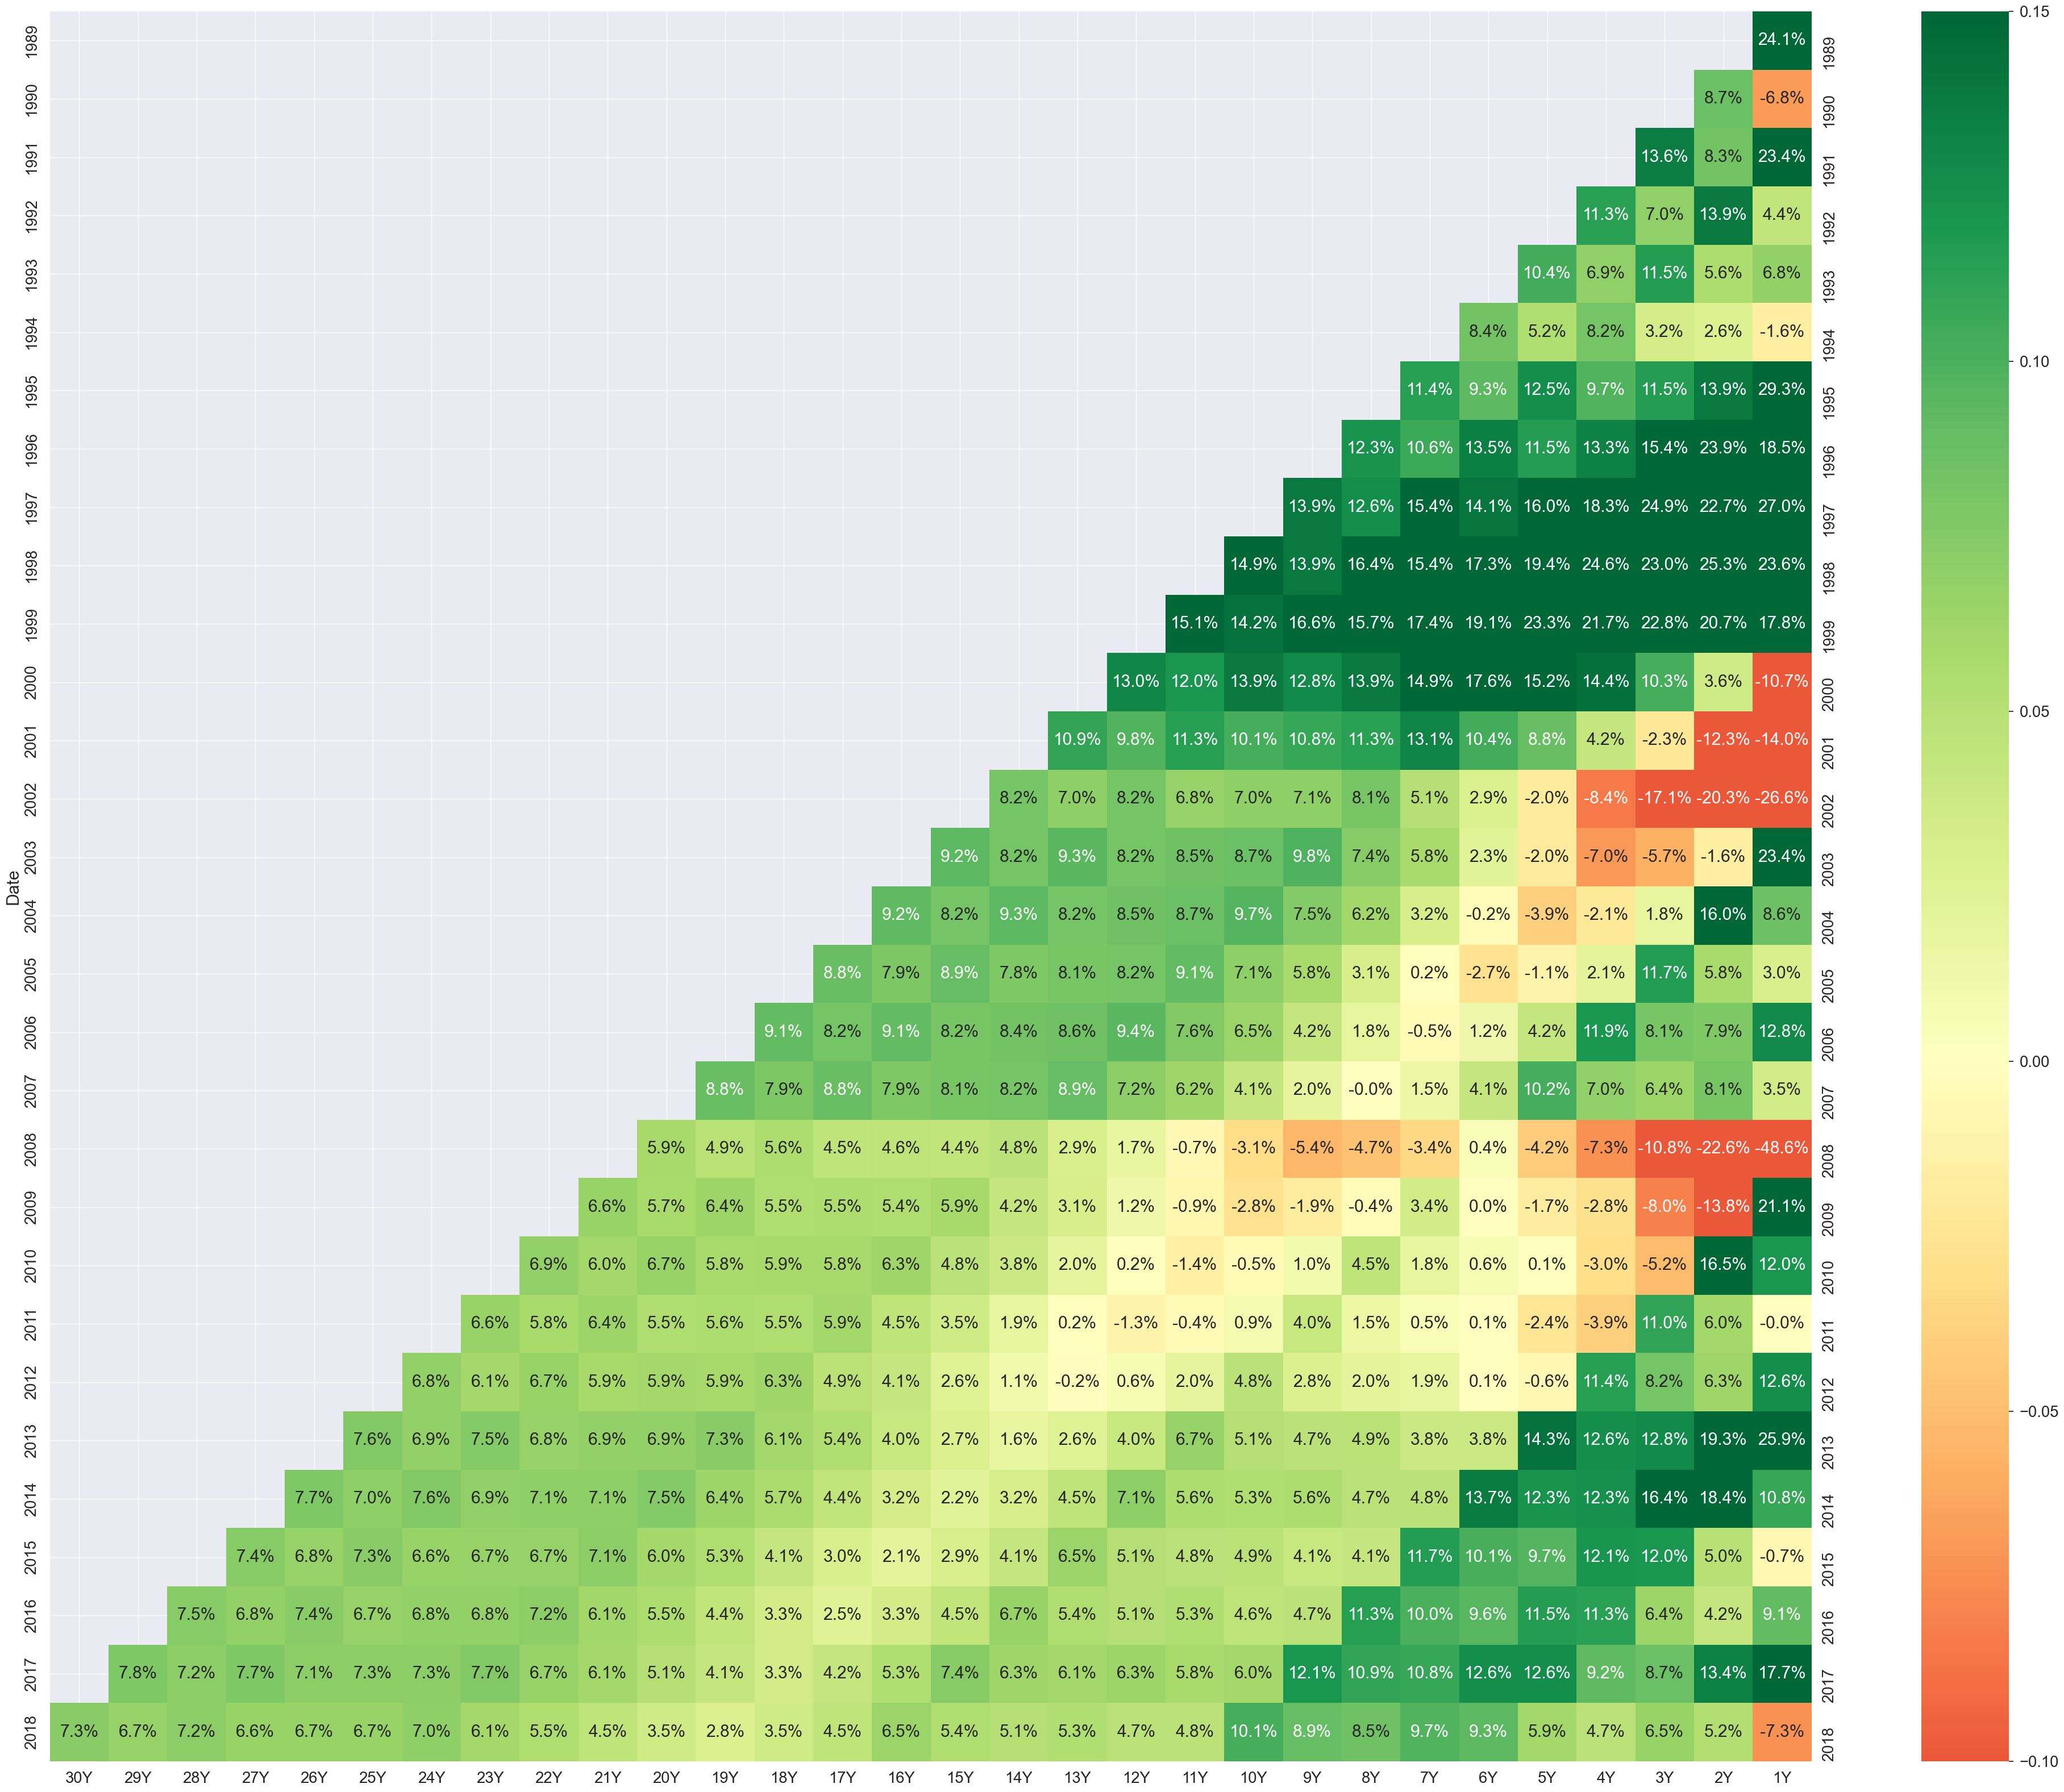

In [172]:
# Plot the return tringle
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot = True, fmt = ".1%", cmap = "RdYlGn", 
            vmin = -0.10, vmax = 0.15, center = 0)
plt.tick_params(axis = "y", labelright =True)
plt.show()

# Interpretation
# on the `x` axis: the investment period (starting from 1Y to 30Y). 
# on the `y`: the final year of investment (or to say the year of divestment.)

# the longer the investment period, 
# the less volatile the overall performance periods with poor returns
# can be recovered by strong periods with positive returns.

In [174]:
(9.1 + 17.1 + (-7.3)) / 3

6.300000000000001

---

# The S&P 500 Dollar Triangle

> We are going to make S&P 500 Dollar Triangle. its mean that we'll able to see the inestment return (in $), for any year to any year! 

- For example, if you want to see: "I invested 100$ in SP-500 in 2010, what the investment return I'll get in 2017?"

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.options.display.float_format = '{:.0f}'.format

C:\Users\97250\AppData\Local\Temp\ipykernel_9960\2456446403.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [176]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col= "Date", 
                    usecols = ["Date", "Close"])

In [177]:
# close price
SP500.head()

Close
Date             
1970-12-31     92
1971-01-04     91
1971-01-05     92
1971-01-06     92
1971-01-07     92

In [178]:
SP500 = SP500.loc["1988-12-30":"2018-12-31"].copy()

In [179]:
SP500.head()

Close
Date             
1988-12-30    278
1989-01-03    275
1989-01-04    279
1989-01-05    280
1989-01-06    281

In [180]:
# Resample to annual close: 
annual = SP500.resample("A", kind = "period").last()
annual

Close
Date       
1988    278
1989    353
1990    330
1991    417
1992    436
1993    466
1994    459
1995    616
1996    741
1997    970
1998   1229
1999   1469
2000   1320
2001   1148
2002    880
2003   1112
2004   1212
2005   1248
2006   1418
2007   1468
2008    903
2009   1115
2010   1258
2011   1258
2012   1426
2013   1848
2014   2059
2015   2044
2016   2239
2017   2674
2018   2486

In [181]:
# Compute the log return
annual["Return"] = np.log(annual.Close / annual.Close.shift())

In [182]:
annual.dropna(inplace = True)

In [183]:
annual

Close  Return
Date               
1989    353       0
1990    330      -0
1991    417       0
1992    436       0
1993    466       0
1994    459      -0
1995    616       0
1996    741       0
1997    970       0
1998   1229       0
1999   1469       0
2000   1320      -0
2001   1148      -0
2002    880      -0
2003   1112       0
2004   1212       0
2005   1248       0
2006   1418       0
2007   1468       0
2008    903      -0
2009   1115       0
2010   1258       0
2011   1258      -0
2012   1426       0
2013   1848       0
2014   2059       0
2015   2044      -0
2016   2239       0
2017   2674       0
2018   2486      -0

In [184]:
# How many years we have?
years = annual.index.size
years

30

In [185]:
# Create window from 1 to number of years
windows = [year for year in range(30, 0, -1)]
windows

[30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1]

In [186]:
# for year in windows:
#     annual["{}Y".format(year)] = annual.Return.rolling(year).mean()

In [187]:
# For each winows size (1Y,2Y,...,30Y)
for year in windows:
    # compute the annual return, based on log return
    # number of years * roling mean of return over `year` (number of years) * 100 [for convert back to $]  
    # we take the exp (for inverse the log return)
    annual["{}Y".format(year)] = np.exp(year * annual.Return.rolling(year).mean()) * 100

In [188]:
annual

Close  Return  30Y  29Y  28Y  27Y  26Y  25Y  24Y  23Y  ...  10Y  9Y  8Y  \
Date                                                         ...                
1989    353       0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN   
1990    330      -0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN   
1991    417       0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN   
1992    436       0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN   
1993    466       0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN   
1994    459      -0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN   
1995    616       0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN   
1996    741       0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN 267   
1997    970       0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN 349 275   
1998   1229       0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  443 348 372   
1999   1469       0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  416 445 352   
2000   1320      -0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  400 317 303   
2001   1148      -0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  275 263 246   
2002    880      -0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  202 189 192   
2003   1112       0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  238 242 181   
2004   1212       0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  264 197 164   
2005   1248       0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  203 169 129   
2006   1418       0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  191 146 115   
2007   1468       0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  151 119 100   
2008    903      -0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   73  61  68   
2009   1115       0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   76  84  97   
2010   1258       0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   95 110 143   
2011   1258      -0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  453  ...  110 143 113   
2012   1426       0  NaN  NaN  NaN  NaN  NaN  NaN  514  404  ...  162 128 118   
2013   1848       0  NaN  NaN  NaN  NaN  NaN  666  523  560  ...  166 153 148   
2014   2059       0  NaN  NaN  NaN  NaN  741  583  623  494  ...  170 165 145   
2015   2044      -0  NaN  NaN  NaN  736  578  619  490  469  ...  164 144 139   
2016   2239       0  NaN  NaN  806  634  678  537  514  480  ...  158 152 248   
2017   2674       0  NaN  963  757  810  641  614  573  582  ...  182 296 240   
2018   2486      -0  895  703  753  596  571  533  541  404  ...  275 223 198   

      7Y  6Y  5Y  4Y  3Y  2Y  1Y  
Date                              
1989 NaN NaN NaN NaN NaN NaN 127  
1990 NaN NaN NaN NaN NaN 119  93  
1991 NaN NaN NaN NaN 150 118 126  
1992 NaN NaN NaN 157 123 132 104  
1993 NaN NaN 168 132 141 112 107  
1994 NaN 165 130 139 110 105  98  
1995 222 174 187 148 141 132 134  
1996 210 224 178 170 159 161 120  
1997 294 233 223 208 211 158 131  
1998 295 282 264 268 200 166 127  
1999 337 315 320 239 198 151 120  
2000 283 287 214 178 136 107  90  
2001 250 186 155 118  93  78  87  
2002 143 119  91  72  60  67  77  
2003 150 115  90  76  84  97 126  
2004 125  99  82  92 106 138 109  
2005 102  85  95 109 142 112 103  
2006  97 107 124 161 128 117 114  
2007 111 128 167 132 121 118 104  
2008  79 103  81  75  72  64  62  
2009 127 100  92  89  79  76 123  
2010 113 104 101  89  86 139 113  
2011 104 101  89  86 139 113 100  
2012 114 101  97 158 128 113 113  
2013 130 126 205 166 147 147 130  
2014 140 228 185 164 164 144 111  
2015 226 183 163 163 143 111  99  
2016 201 178 178 157 121 109 110  
2017 213 213 187 145 130 131 119  
2018 198 174 134 121 122 111  93  

[30 rows x 32 columns]

In [189]:
triangle = annual.drop(columns = ["Close", "Return"])

In [190]:
triangle

30Y  29Y  28Y  27Y  26Y  25Y  24Y  23Y  22Y  21Y  ...  10Y  9Y  8Y  7Y  \
Date                                                    ...                    
1989  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN NaN   
1990  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN NaN   
1991  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN NaN   
1992  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN NaN   
1993  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN NaN   
1994  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN NaN   
1995  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN 222   
1996  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN 267 210   
1997  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN 349 275 294   
1998  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  443 348 372 295   
1999  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  416 445 352 337   
2000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  400 317 303 283   
2001  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  275 263 246 250   
2002  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  202 189 192 143   
2003  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  238 242 181 150   
2004  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  264 197 164 125   
2005  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  203 169 129 102   
2006  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  191 146 115  97   
2007  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  151 119 100 111   
2008  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   73  61  68  79   
2009  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  402  ...   76  84  97 127   
2010  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  453  356  ...   95 110 143 113   
2011  NaN  NaN  NaN  NaN  NaN  NaN  NaN  453  356  381  ...  110 143 113 104   
2012  NaN  NaN  NaN  NaN  NaN  NaN  514  404  432  342  ...  162 128 118 114   
2013  NaN  NaN  NaN  NaN  NaN  666  523  560  443  424  ...  166 153 148 130   
2014  NaN  NaN  NaN  NaN  741  583  623  494  473  441  ...  170 165 145 140   
2015  NaN  NaN  NaN  736  578  619  490  469  438  445  ...  164 144 139 226   
2016  NaN  NaN  806  634  678  537  514  480  487  363  ...  158 152 248 201   
2017  NaN  963  757  810  641  614  573  582  434  361  ...  182 296 240 213   
2018  895  703  753  596  571  533  541  404  336  256  ...  275 223 198 198   

      6Y  5Y  4Y  3Y  2Y  1Y  
Date                          
1989 NaN NaN NaN NaN NaN 127  
1990 NaN NaN NaN NaN 119  93  
1991 NaN NaN NaN 150 118 126  
1992 NaN NaN 157 123 132 104  
1993 NaN 168 132 141 112 107  
1994 165 130 139 110 105  98  
1995 174 187 148 141 132 134  
1996 224 178 170 159 161 120  
1997 233 223 208 211 158 131  
1998 282 264 268 200 166 127  
1999 315 320 239 198 151 120  
2000 287 214 178 136 107  90  
2001 186 155 118  93  78  87  
2002 119  91  72  60  67  77  
2003 115  90  76  84  97 126  
2004  99  82  92 106 138 109  
2005  85  95 109 142 112 103  
2006 107 124 161 128 117 114  
2007 128 167 132 121 118 104  
2008 103  81  75  72  64  62  
2009 100  92  89  79  76 123  
2010 104 101  89  86 139 113  
2011 101  89  86 139 113 100  
2012 101  97 158 128 113 113  
2013 126 205 166 147 147 130  
2014 228 185 164 164 144 111  
2015 183 163 163 143 111  99  
2016 178 178 157 121 109 110  
2017 213 187 145 130 131 119  
2018 174 134 121 122 111  93  

[30 rows x 30 columns]

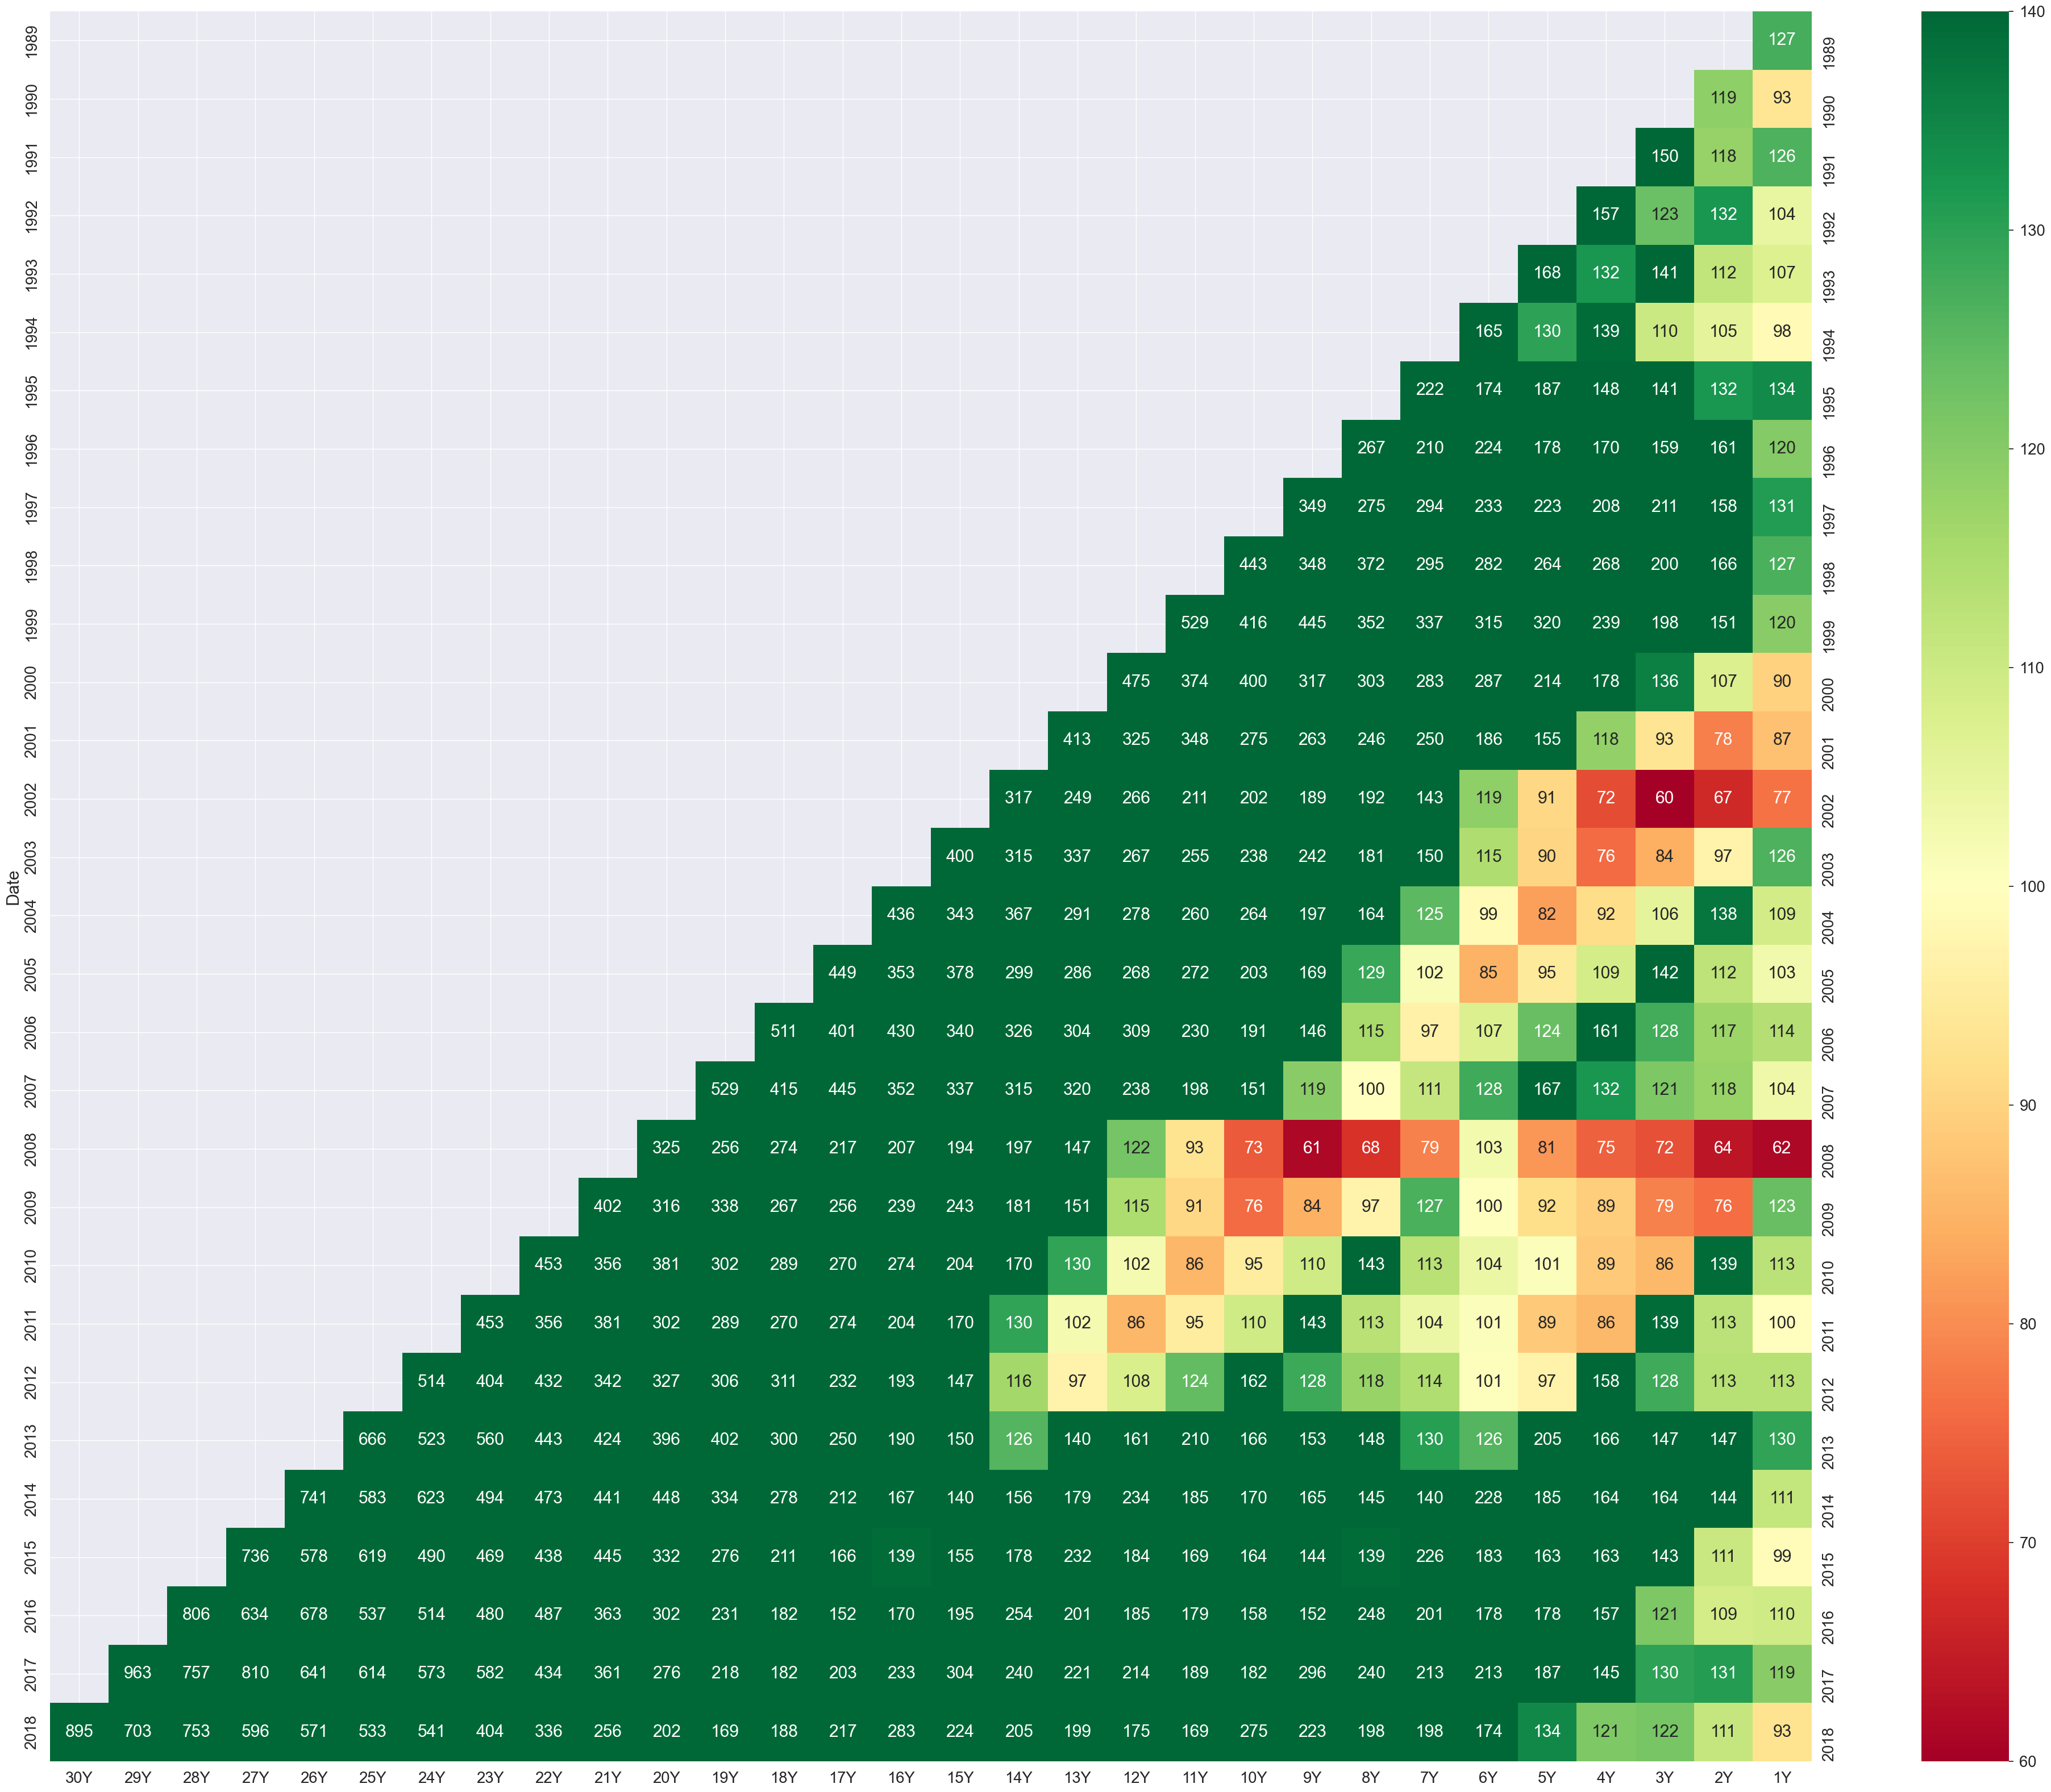

In [191]:
# Plot the price tringle:

plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot = True, fmt = ".0f",  cmap = "RdYlGn", 
            vmin =60, vmax = 140, center = 100)
plt.tick_params(axis = "y", labelright =True)
plt.show()

# Interpretation:
# you can see what is the investment return from any year to any year.

# e.g:
# if you buy 1 stock in 2010, in 2015 your investment return was: 185$

---

# The S&P 500 Return Radar

> like the annualize return, just weekly. 

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\97250\AppData\Local\Temp\ipykernel_9960\1074677123.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [193]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col= "Date", 
                    usecols = ["Date", "Close"])

In [194]:
SP500.head()

Close
Date             
1970-12-31     92
1971-01-04     91
1971-01-05     92
1971-01-06     92
1971-01-07     92

In [195]:
SP500 = SP500.loc["1988-12-30":"2018-12-31"].copy()

In [196]:
SP500.head()

Close
Date             
1988-12-30    278
1989-01-03    275
1989-01-04    279
1989-01-05    280
1989-01-06    281

In [197]:
weekly = SP500.resample("W", kind = "period").last()
weekly

Close
Date                        
1988-12-26/1989-01-01    278
1989-01-02/1989-01-08    281
1989-01-09/1989-01-15    284
1989-01-16/1989-01-22    287
1989-01-23/1989-01-29    294
...                      ...
2018-11-26/2018-12-02   2760
2018-12-03/2018-12-09   2633
2018-12-10/2018-12-16   2600
2018-12-17/2018-12-23   2417
2018-12-24/2018-12-30   2486

[1566 rows x 1 columns]

In [198]:
# take the weekly return, and annualize that (*52)
weekly["Return"] = np.log(weekly.Close / weekly.Close.shift())*52


In [199]:
weekly.dropna(inplace = True)

In [200]:
weekly

Close  Return
Date                                
1989-01-02/1989-01-08    281       1
1989-01-09/1989-01-15    284       1
1989-01-16/1989-01-22    287       1
1989-01-23/1989-01-29    294       1
1989-01-30/1989-02-05    297       1
...                      ...     ...
2018-11-26/2018-12-02   2760       2
2018-12-03/2018-12-09   2633      -2
2018-12-10/2018-12-16   2600      -1
2018-12-17/2018-12-23   2417      -4
2018-12-24/2018-12-30   2486       1

[1565 rows x 2 columns]

In [201]:
weeks = weekly.index.size
weeks

1565

In [ ]:
windows = [week for week in range(weeks, 0, -1)]
windows

In [ ]:
for week in windows:
    weekly["{}W".format(week)] = weekly.Return.rolling(week).mean()

In [204]:
weekly

Close  Return  1565W  1564W  1563W  1562W  1561W  \
Date                                                                      
1989-01-02/1989-01-08    281       1    NaN    NaN    NaN    NaN    NaN   
1989-01-09/1989-01-15    284       1    NaN    NaN    NaN    NaN    NaN   
1989-01-16/1989-01-22    287       1    NaN    NaN    NaN    NaN    NaN   
1989-01-23/1989-01-29    294       1    NaN    NaN    NaN    NaN    NaN   
1989-01-30/1989-02-05    297       1    NaN    NaN    NaN    NaN    NaN   
...                      ...     ...    ...    ...    ...    ...    ...   
2018-11-26/2018-12-02   2760       2    NaN    NaN    NaN    NaN      0   
2018-12-03/2018-12-09   2633      -2    NaN    NaN    NaN      0      0   
2018-12-10/2018-12-16   2600      -1    NaN    NaN      0      0      0   
2018-12-17/2018-12-23   2417      -4    NaN      0      0      0      0   
2018-12-24/2018-12-30   2486       1      0      0      0      0      0   

                       1560W  1559W  1558W  ...  10W  9W  8W  7W  6W  5W  4W  \
Date                                        ...                                
1989-01-02/1989-01-08    NaN    NaN    NaN  ...  NaN NaN NaN NaN NaN NaN NaN   
1989-01-09/1989-01-15    NaN    NaN    NaN  ...  NaN NaN NaN NaN NaN NaN NaN   
1989-01-16/1989-01-22    NaN    NaN    NaN  ...  NaN NaN NaN NaN NaN NaN NaN   
1989-01-23/1989-01-29    NaN    NaN    NaN  ...  NaN NaN NaN NaN NaN NaN   1   
1989-01-30/1989-02-05    NaN    NaN    NaN  ...  NaN NaN NaN NaN NaN   1   1   
...                      ...    ...    ...  ...  ...  ..  ..  ..  ..  ..  ..   
2018-11-26/2018-12-02      0      0      0  ...   -0  -0  -0  -0  -0   0   0   
2018-12-03/2018-12-09      0      0      0  ...   -1  -1  -0  -0  -0  -0  -1   
2018-12-10/2018-12-16      0      0      0  ...   -1  -0  -0  -0  -0  -1  -1   
2018-12-17/2018-12-23      0      0      0  ...   -1  -1  -1  -1  -1  -1  -1   
2018-12-24/2018-12-30      0      0      0  ...   -1  -0  -1  -1  -1  -1  -1   

                       3W  2W  1W  
Date                               
1989-01-02/1989-01-08 NaN NaN   1  
1989-01-09/1989-01-15 NaN   1   1  
1989-01-16/1989-01-22   1   1   1  
1989-01-23/1989-01-29   1   1   1  
1989-01-30/1989-02-05   1   1   1  
...                    ..  ..  ..  
2018-11-26/2018-12-02  -0   0   2  
2018-12-03/2018-12-09  -1   0  -2  
2018-12-10/2018-12-16  -0  -2  -1  
2018-12-17/2018-12-23  -2  -2  -4  
2018-12-24/2018-12-30  -1  -1   1  

[1565 rows x 1567 columns]

In [205]:
triangle = weekly.drop(columns = ["Close", "Return"])

In [206]:
triangle

1565W  1564W  1563W  1562W  1561W  1560W  1559W  1558W  \
Date                                                                            
1989-01-02/1989-01-08    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1989-01-09/1989-01-15    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1989-01-16/1989-01-22    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1989-01-23/1989-01-29    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1989-01-30/1989-02-05    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...                      ...    ...    ...    ...    ...    ...    ...    ...   
2018-11-26/2018-12-02    NaN    NaN    NaN    NaN      0      0      0      0   
2018-12-03/2018-12-09    NaN    NaN    NaN      0      0      0      0      0   
2018-12-10/2018-12-16    NaN    NaN      0      0      0      0      0      0   
2018-12-17/2018-12-23    NaN      0      0      0      0      0      0      0   
2018-12-24/2018-12-30      0      0      0      0      0      0      0      0   

                       1557W  1556W  ...  10W  9W  8W  7W  6W  5W  4W  3W  2W  \
Date                                 ...                                        
1989-01-02/1989-01-08    NaN    NaN  ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1989-01-09/1989-01-15    NaN    NaN  ...  NaN NaN NaN NaN NaN NaN NaN NaN   1   
1989-01-16/1989-01-22    NaN    NaN  ...  NaN NaN NaN NaN NaN NaN NaN   1   1   
1989-01-23/1989-01-29    NaN    NaN  ...  NaN NaN NaN NaN NaN NaN   1   1   1   
1989-01-30/1989-02-05    NaN    NaN  ...  NaN NaN NaN NaN NaN   1   1   1   1   
...                      ...    ...  ...  ...  ..  ..  ..  ..  ..  ..  ..  ..   
2018-11-26/2018-12-02      0      0  ...   -0  -0  -0  -0  -0   0   0  -0   0   
2018-12-03/2018-12-09      0      0  ...   -1  -1  -0  -0  -0  -0  -1  -1   0   
2018-12-10/2018-12-16      0      0  ...   -1  -0  -0  -0  -0  -1  -1  -0  -2   
2018-12-17/2018-12-23      0      0  ...   -1  -1  -1  -1  -1  -1  -1  -2  -2   
2018-12-24/2018-12-30      0      0  ...   -1  -0  -1  -1  -1  -1  -1  -1  -1   

                       1W  
Date                       
1989-01-02/1989-01-08   1  
1989-01-09/1989-01-15   1  
1989-01-16/1989-01-22   1  
1989-01-23/1989-01-29   1  
1989-01-30/1989-02-05   1  
...                    ..  
2018-11-26/2018-12-02   2  
2018-12-03/2018-12-09  -2  
2018-12-10/2018-12-16  -1  
2018-12-17/2018-12-23  -4  
2018-12-24/2018-12-30   1  

[1565 rows x 1565 columns]

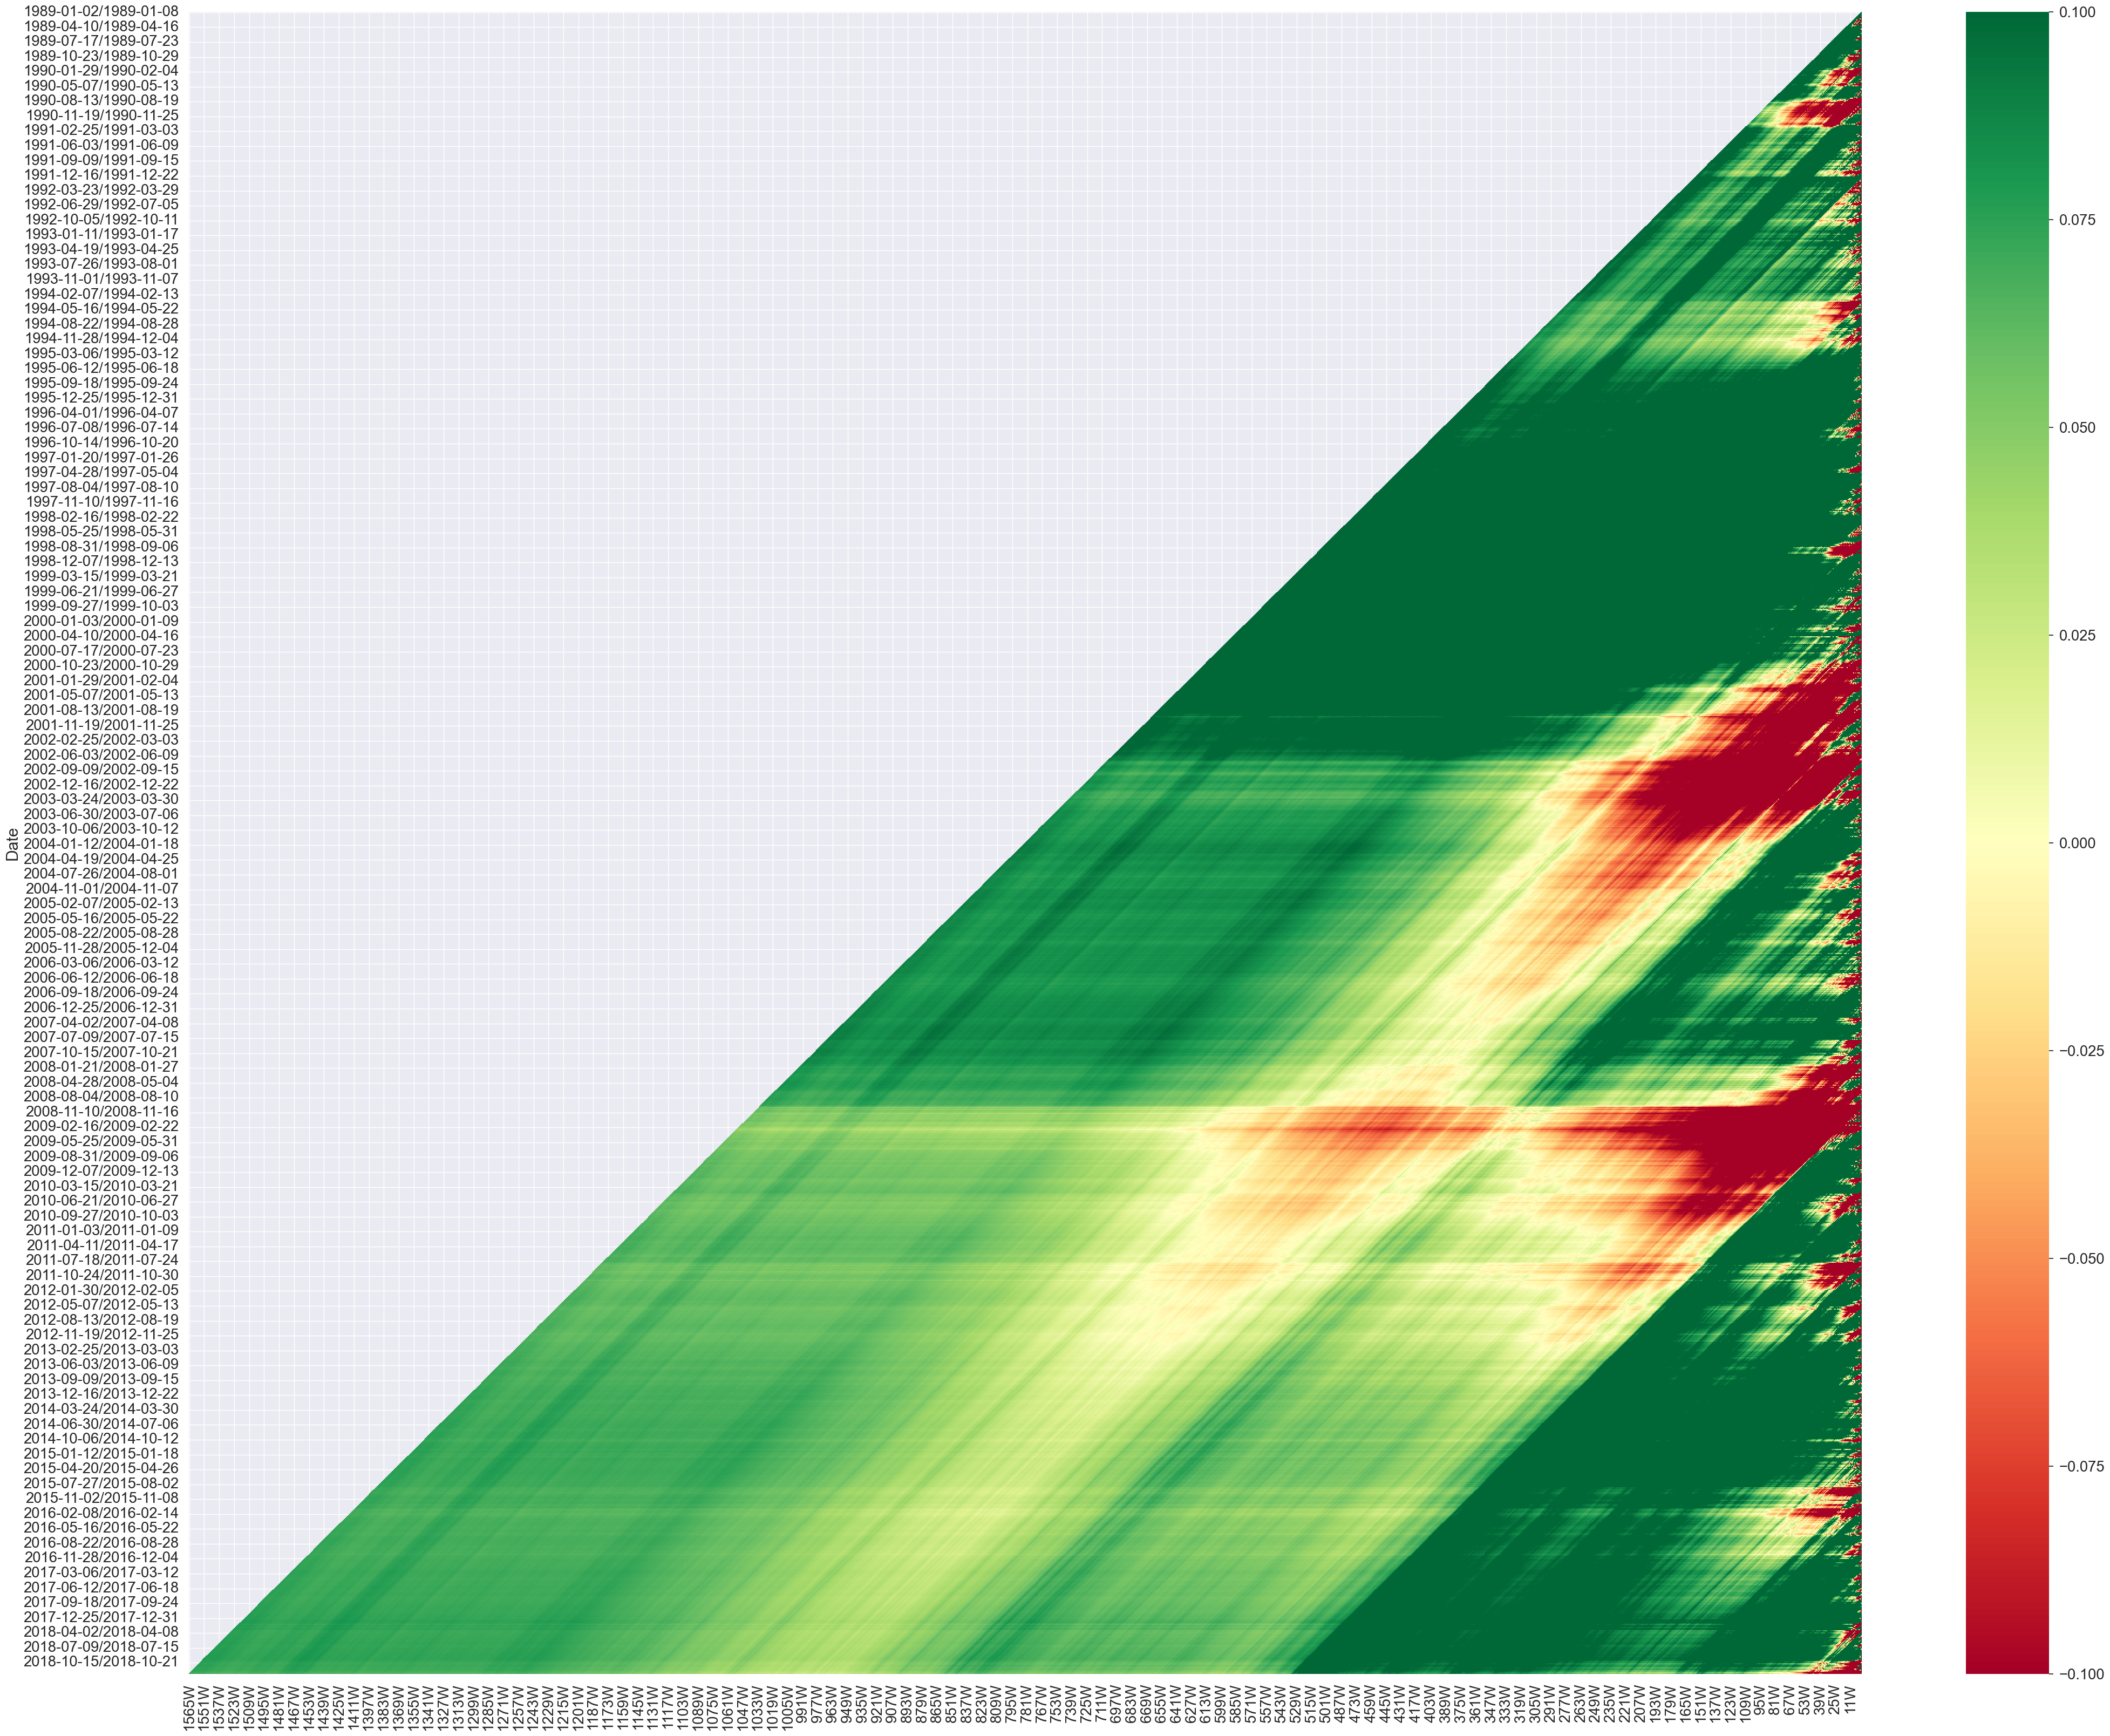

In [207]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot =False, cmap = "RdYlGn", 
            vmin = -0.10, vmax = 0.10, center = 0)
#plt.tick_params(axis = "y", labelright =True)
plt.show()


---

## Exponentially-weighted Moving Averages (EWMA)


In [208]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\97250\AppData\Local\Temp\ipykernel_9960\3483326838.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [209]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col= "Date", usecols= ["Date", "Close"])

In [210]:
SP500.head()

Close
Date             
1970-12-31     92
1971-01-04     91
1971-01-05     92
1971-01-06     92
1971-01-07     92

In [211]:
SP500 = SP500.loc["2008-12-31":"2018-12-31"].copy()

In [212]:
SP500.Close.rolling(window = 10).mean()

Date
2008-12-31    NaN
2009-01-02    NaN
2009-01-05    NaN
2009-01-06    NaN
2009-01-07    NaN
             ... 
2018-12-21   2566
2018-12-24   2537
2018-12-26   2520
2018-12-27   2504
2018-12-28   2488
Name: Close, Length: 2516, dtype: float64

In [213]:
SP500.Close.ewm(span = 10, min_periods= 10).mean()

Date
2008-12-31    NaN
2009-01-02    NaN
2009-01-05    NaN
2009-01-06    NaN
2009-01-07    NaN
             ... 
2018-12-21   2547
2018-12-24   2511
2018-12-26   2504
2018-12-27   2501
2018-12-28   2498
Name: Close, Length: 2516, dtype: float64

In [214]:
SP500["SMA"] = SP500.Close.rolling(window = 100).mean()
SP500["EMA"] = SP500.Close.ewm(span = 100, min_periods= 100).mean()

In [215]:
SP500

Close  SMA  EMA
Date                       
2008-12-31    903  NaN  NaN
2009-01-02    932  NaN  NaN
2009-01-05    927  NaN  NaN
2009-01-06    935  NaN  NaN
2009-01-07    907  NaN  NaN
...           ...  ...  ...
2018-12-21   2417 2786 2732
2018-12-24   2351 2781 2725
2018-12-26   2468 2778 2719
2018-12-27   2489 2774 2715
2018-12-28   2486 2771 2710

[2516 rows x 3 columns]

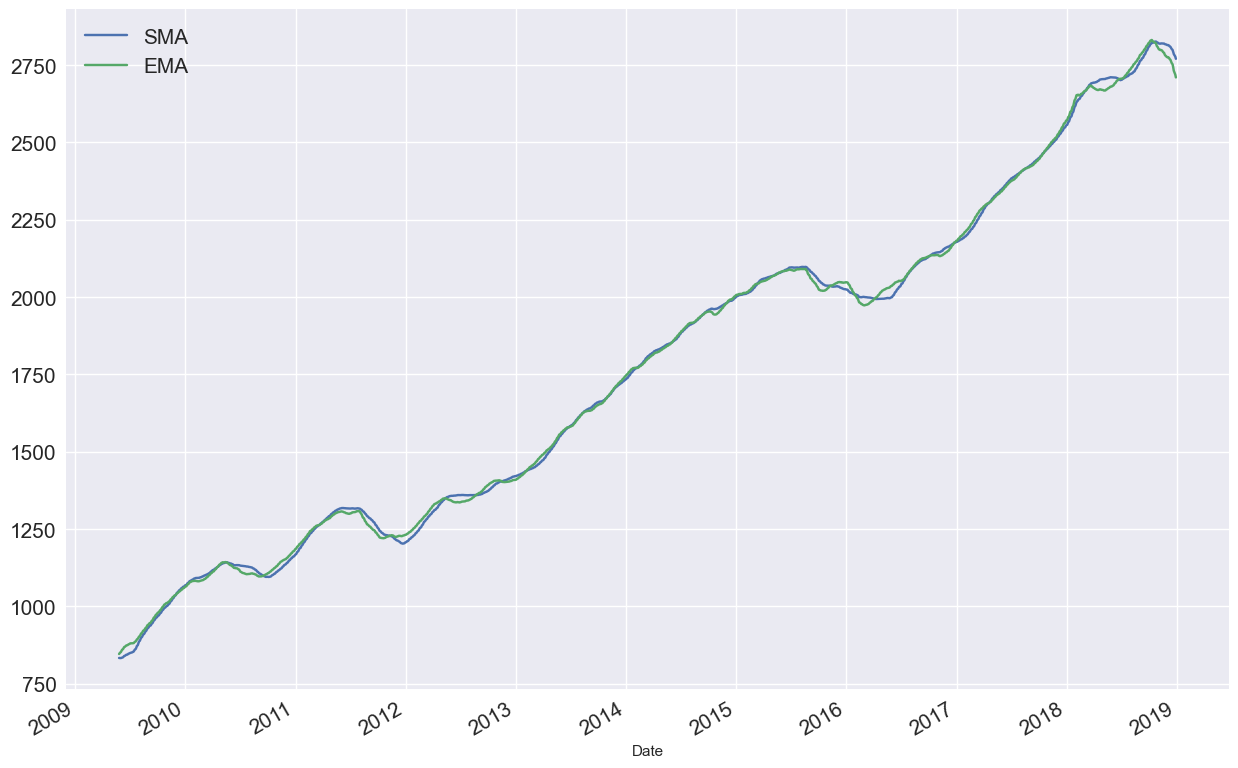

In [216]:
SP500.iloc[:,-2:].plot(figsize = (15,10), fontsize =15)
plt.legend(fontsize = 15)
plt.show()

---

# Expanding Windows

- Expending winows:
    - our windows increase (in observations) as we move forward in time.

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\97250\AppData\Local\Temp\ipykernel_9960\3483326838.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [218]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col= "Date", usecols= ["Date", "Close"])

In [219]:
SP500 = SP500.loc["2008-12-31":"2018-12-31"].copy()

In [220]:
SP500.head()

Close
Date             
2008-12-31    903
2009-01-02    932
2009-01-05    927
2009-01-06    935
2009-01-07    907

In [221]:
SP500.Close.rolling(10).mean()

Date
2008-12-31    NaN
2009-01-02    NaN
2009-01-05    NaN
2009-01-06    NaN
2009-01-07    NaN
             ... 
2018-12-21   2566
2018-12-24   2537
2018-12-26   2520
2018-12-27   2504
2018-12-28   2488
Name: Close, Length: 2516, dtype: float64

In [222]:
SP500.Close.expanding(min_periods = 1).mean()

Date
2008-12-31    903
2009-01-02    918
2009-01-05    921
2009-01-06    924
2009-01-07    921
             ... 
2018-12-21   1764
2018-12-24   1764
2018-12-26   1765
2018-12-27   1765
2018-12-28   1765
Name: Close, Length: 2516, dtype: float64

In [230]:
SP500["SMA50"] = SP500.Close.rolling(50).mean()

# expanding windows - windows that incease allways with the time 
# (number of observation increase over the time)

# take allways the most recent max value:  
SP500["EXP"] = SP500.Close.expanding().max() 

# SP500["EXP"] = SP500.Close.expanding().mean() # try this 
# SP500["EXP"] = SP500.Close.expanding().min() # try this

In [231]:
SP500.head()

Close  SMA50  EXP
Date                         
2008-12-31    903    NaN  903
2009-01-02    932    NaN  932
2009-01-05    927    NaN  932
2009-01-06    935    NaN  935
2009-01-07    907    NaN  935

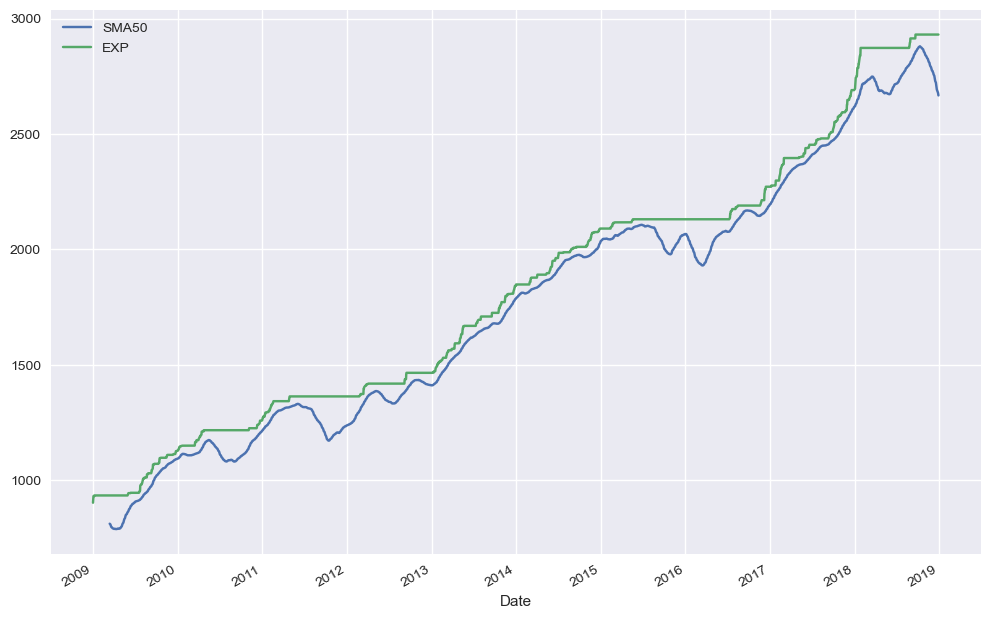

In [232]:
# Plot the SMA and the expending windows:
SP500.iloc[:, -2:].plot(figsize = (12, 8))
plt.show()

# expending windows (apply the max function): where there is flat line - no new max value. 

----

# Rolling Correlation
> when we need to calculate the correlation between two veriables over time. 

- __Example__: we want to calculate the rolling correlation between `AAPL` and `MSFT`

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\97250\AppData\Local\Temp\ipykernel_9960\3483326838.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [248]:
stocks = pd.read_csv("stocks.csv", header = [0,1], index_col= [0], parse_dates= [0]).Close

In [249]:
stocks.head()

AAPL  BA  DIS  IBM  KO  MSFT
Date                                    
2010-01-04     8  56   32  127  29    31
2010-01-05     8  58   32  125  28    31
2010-01-06     8  60   32  124  28    31
2010-01-07     8  62   32  124  28    30
2010-01-08     8  62   32  125  28    31

In [250]:
# Select only two instruments: 
app_ba = stocks.loc["2009-12-31":"2018", ["AAPL", "BA"]]

In [251]:
app_ba.head()

AAPL  BA
Date                
2010-01-04     8  56
2010-01-05     8  58
2010-01-06     8  60
2010-01-07     8  62
2010-01-08     8  62

In [252]:
# resample to M freq
month_ret = app_ba.resample("M", kind = "period").last().pct_change().dropna()

In [253]:
month_ret.head()

AAPL  BA
Date             
2010-02     0   0
2010-03     0   0
2010-04     0  -0
2010-05    -0  -0
2010-06    -0  -0

In [254]:
month_ret.tail()

AAPL  BA
Date             
2018-08     0  -0
2018-09    -0   0
2018-10    -0  -0
2018-11    -0  -0
2018-12    -0  -0

In [255]:
month_ret.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 107 entries, 2010-02 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    107 non-null    float64
 1   BA      107 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [256]:
# compute the correlation between AAPL and BA for the whole time period: 
month_ret.corr()

AAPL  BA
AAPL     1   0
BA       0   1

In [257]:
# We can calculate the rolling correlation of 36 months between AAPL and BA  
month_ret.AAPL.rolling(36).corr(month_ret.BA).dropna()

Date
2013-01   0 
2013-02   0 
2013-03   0 
2013-04   0 
2013-05   0 
          ..
2018-08   0 
2018-09   0 
2018-10   0 
2018-11   0 
2018-12   0 
Freq: M, Length: 72, dtype: float64

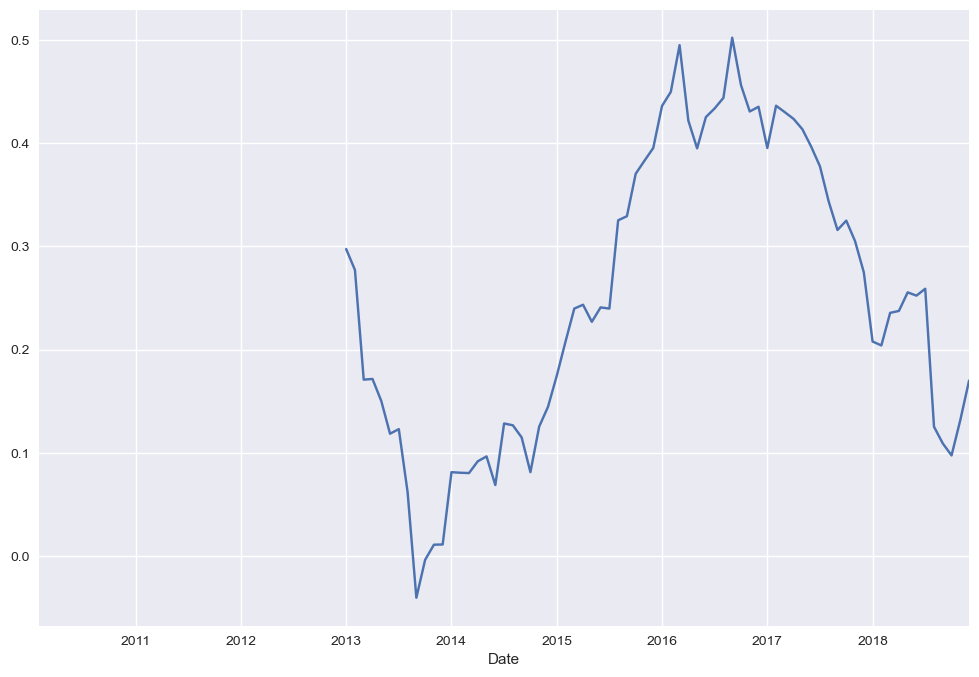

In [259]:
month_ret.AAPL.rolling(36).corr(month_ret.BA).plot(figsize = (12,8))
plt.show()

# Plot thge rolling correlation between AAPL and BA 
# interpretation:
# for example, in 2016, was the higer correlation between AAPL and BA

# the correlation voletile... 

---

# rolling() with fixed-sized time offsets

In [260]:
app_ba.head(7)

AAPL  BA
Date                
2010-01-04     8  56
2010-01-05     8  58
2010-01-06     8  60
2010-01-07     8  62
2010-01-08     8  62
2010-01-11     8  61
2010-01-12     7  60

In [261]:
app_ba.BA.rolling(window = 3).mean().head(7)

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06    58
2010-01-07    60
2010-01-08    61
2010-01-11    62
2010-01-12    61
Name: BA, dtype: float64

In [262]:
app_ba.head(7)

AAPL  BA
Date                
2010-01-04     8  56
2010-01-05     8  58
2010-01-06     8  60
2010-01-07     8  62
2010-01-08     8  62
2010-01-11     8  61
2010-01-12     7  60

In [263]:
# Compute the simple moving avarage of the last 3 calender days! 
app_ba.BA.rolling(window = "3D", min_periods = 3).mean()

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06    58
2010-01-07    60
2010-01-08    61
              ..
2018-12-24   NaN
2018-12-26   NaN
2018-12-27   NaN
2018-12-28   316
2018-12-31   NaN
Name: BA, Length: 2264, dtype: float64

<Axes: xlabel='Date'>

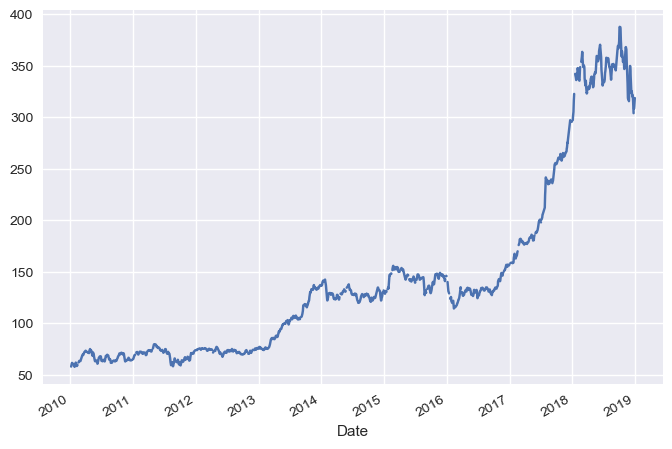

In [265]:
# the simple moving avarage of the last 5 calender days! 
app_ba.BA.rolling(window = "5D", min_periods = 3).mean().plot()
# lot's of missing values? min_periods = 3 . 

<Axes: xlabel='Date'>

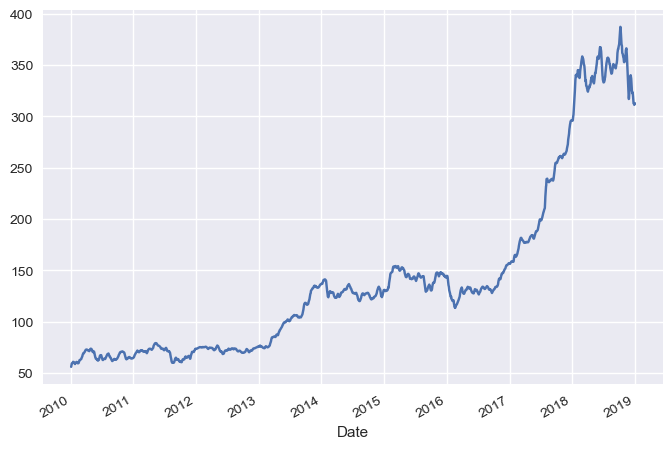

In [269]:
app_ba.BA.rolling(window = "10D").mean().plot()

<Axes: xlabel='Date'>

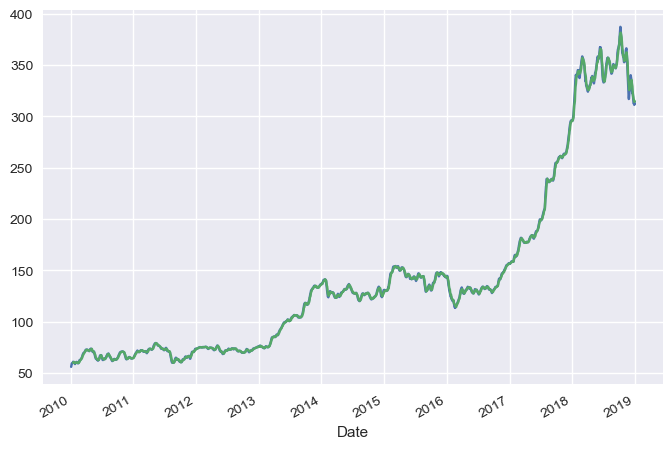

In [293]:
plt.figure()
app_ba.BA.rolling(window = "10D").mean().plot()
app_ba.BA.rolling(window = 10).mean().plot()

---

# Merging Time Series

In [272]:
import pandas as pd

In [273]:
stocks = pd.read_csv("stocks.csv", header = [0,1], index_col= [0], parse_dates= [0]).Close

In [274]:
stocks.head()

AAPL  BA  DIS  IBM  KO  MSFT
Date                                    
2010-01-04     8  56   32  127  29    31
2010-01-05     8  58   32  125  28    31
2010-01-06     8  60   32  124  28    31
2010-01-07     8  62   32  124  28    30
2010-01-08     8  62   32  125  28    31

In [275]:
aapl = stocks.loc["2010-01-01" : "2014-12-31", "AAPL"].to_frame()
aapl.head()

AAPL
Date            
2010-01-04     8
2010-01-05     8
2010-01-06     8
2010-01-07     8
2010-01-08     8

In [276]:
ba = stocks.loc["2012-01-01" : "2016-12-31", "BA"].to_frame()
ba.head()

BA
Date          
2012-01-03  74
2012-01-04  74
2012-01-05  74
2012-01-06  74
2012-01-09  75

In [277]:
aapl["BA"] = ba.BA

In [278]:
aapl.head()

AAPL  BA
Date                
2010-01-04     8 NaN
2010-01-05     8 NaN
2010-01-06     8 NaN
2010-01-07     8 NaN
2010-01-08     8 NaN

In [279]:
aapl.tail()

AAPL  BA
Date                
2014-12-24    28 131
2014-12-26    28 132
2014-12-29    28 132
2014-12-30    28 132
2014-12-31    28 130

In [280]:
aapl.dropna()

AAPL  BA
Date                
2012-01-03    15  74
2012-01-04    15  74
2012-01-05    15  74
2012-01-06    15  74
2012-01-09    15  75
...          ...  ..
2014-12-24    28 131
2014-12-26    28 132
2014-12-29    28 132
2014-12-30    28 132
2014-12-31    28 130

[754 rows x 2 columns]

In [281]:
ba.reindex(aapl.index).dropna()

BA
Date          
2012-01-03  74
2012-01-04  74
2012-01-05  74
2012-01-06  74
2012-01-09  75
...         ..
2014-12-24 131
2014-12-26 132
2014-12-29 132
2014-12-30 132
2014-12-31 130

[754 rows x 1 columns]

In [282]:
dis = stocks.loc["2010-01-01" : "2016-12-31", "DIS"].resample("W-Fri").last().to_frame()
dis.head()

DIS
Date           
2010-01-08   32
2010-01-15   31
2010-01-22   30
2010-01-29   30
2010-02-05   30

In [283]:
aapl.head()

AAPL  BA
Date                
2010-01-04     8 NaN
2010-01-05     8 NaN
2010-01-06     8 NaN
2010-01-07     8 NaN
2010-01-08     8 NaN

In [284]:
aapl["DIS"] = dis.DIS

In [285]:
aapl.head(10)

AAPL  BA  DIS
Date                     
2010-01-04     8 NaN  NaN
2010-01-05     8 NaN  NaN
2010-01-06     8 NaN  NaN
2010-01-07     8 NaN  NaN
2010-01-08     8 NaN   32
2010-01-11     8 NaN  NaN
2010-01-12     7 NaN  NaN
2010-01-13     8 NaN  NaN
2010-01-14     7 NaN  NaN
2010-01-15     7 NaN   31

In [286]:
dis.reindex(aapl.index)

DIS
Date           
2010-01-04  NaN
2010-01-05  NaN
2010-01-06  NaN
2010-01-07  NaN
2010-01-08   32
...         ...
2014-12-24  NaN
2014-12-26   95
2014-12-29  NaN
2014-12-30  NaN
2014-12-31  NaN

[1258 rows x 1 columns]

In [287]:
dis["AAPL"] = aapl.AAPL

In [288]:
dis.head(10)

DIS  AAPL
Date                 
2010-01-08   32     8
2010-01-15   31     7
2010-01-22   30     7
2010-01-29   30     7
2010-02-05   30     7
2010-02-12   30     7
2010-02-19   31     7
2010-02-26   31     7
2010-03-05   33     8
2010-03-12   34     8